In [1]:
### importieren der datei
import pandas as pd

df = pd.read_excel("../Datensätze/BA_DATENSATZ_2.xlsx", sheet_name=3)
df.head()

#sheet_name=3: Datenbearbeitung-1 in Excel

,CurveId,CycleId,CycleDate,Material,Schmierung,Durchmesser,Schräge,Rauheit,Platte,SignalYName,...,286.3,286.4,286.5,286.6,286.7,286.8,286.9,287,287.1,287.2
0,550.0,541.0,43944.682718,Aluminium,Geölt,"7,8mm",0°,Glatt,Nr.1,Kraft,...,13.60326,13.585070,13.59443,13.59443,13.566890,13.566890,13.558050,13.548700,13.73108,20.813271
1,552.0,542.0,43944.688241,Aluminium,Geölt,"7,8mm",0°,Glatt,Nr.1,Kraft,...,10.19750,10.151970,10.12430,10.06955,10.014800,9.960042,9.923732,9.878200,13.12078,21.185160
2,554.0,543.0,43944.689253,Aluminium,Geölt,"7,8mm",0°,Glatt,Nr.1,Kraft,...,10.37975,10.343440,10.30713,10.24316,10.206850,10.169960,10.133650,10.078900,13.32137,21.402750
3,556.0,544.0,43944.689874,Aluminium,Geölt,"7,8mm",0°,Glatt,Nr.1,Kraft,...,12.16472,12.128280,12.09184,12.02808,11.991640,11.936980,11.882330,11.855000,12.82916,20.667999
4,558.0,545.0,43944.690497,Aluminium,Geölt,"7,8mm",0°,Glatt,Nr.1,Kraft,...,9.64995,9.595278,9.55009,9.49486,9.449672,9.395000,9.303508,9.221499,12.44715,20.077810


In [2]:
import numpy as np

anzahl_zeile = 551
spalten_start = 62
spalten_ende = 332
anzahl_spalte = spalten_ende - spalten_start


### weg in mm
x_weg = np.array(df.iloc[552, spalten_start:spalten_ende])


### kraft in kN
y_kraft = np.zeros((anzahl_zeile) * anzahl_spalte).reshape((anzahl_zeile), anzahl_spalte)


### speichern kraftverlauf in einer matrix
for i in range(0, anzahl_zeile):
    y_kraft[i] = df.iloc[i, spalten_start:spalten_ende]
       
print(x_weg)    
print(y_kraft.shape)
print(anzahl_zeile * anzahl_spalte)
print(y_kraft[550])

[260.0 260.1 260.2 260.3 260.4 260.5 260.6 260.7 260.8 260.9 261.0 261.1
 261.2 261.3 261.4 261.5 261.6 261.7 261.8 261.9 262.0 262.1 262.2 262.3
 262.4 262.5 262.6 262.7 262.8 262.9 263.0 263.1 263.2 263.3 263.4 263.5
 263.6 263.7 263.8 263.9 264.0 264.1 264.2 264.3 264.4 264.5 264.6 264.7
 264.8 264.9 265.0 265.1 265.2 265.3 265.4 265.5 265.6 265.7 265.8 265.9
 266.0 266.1 266.2 266.3 266.4 266.5 266.6 266.7 266.8 266.9 267.0 267.1
 267.2 267.3 267.4 267.5 267.6 267.7 267.8 267.9 268.0 268.1 268.2 268.3
 268.4 268.5 268.6 268.7 268.8 268.9 269.0 269.1 269.2 269.3 269.4 269.5
 269.6 269.7 269.8 269.9 270.0 270.1 270.2 270.3 270.4 270.5 270.6 270.7
 270.8 270.9 271.0 271.1 271.2 271.3 271.4 271.5 271.6 271.7 271.8 271.9
 272.0 272.1 272.2 272.3 272.4 272.5 272.6 272.7 272.8 272.9 273.0 273.1
 273.2 273.3 273.4 273.5 273.6 273.7 273.8 273.9 274.0 274.1 274.2 274.3
 274.4 274.5 274.6 274.7 274.8 274.9 275.0 275.1 275.2 275.3 275.4 275.5
 275.6 275.7 275.8 275.9 276.0 276.1 276.2 276.3 27

In [3]:
Bereich_Aluminium_geölt = 95
Bereich_Kupfer_geölt = 164
Bereich_Stahl_geölt = 265
Bereich_Stahl_nicht_geölt = 338
Bereich_Schieflage_1 = 408
Bereich_Schieflage_3 = 476
Bereich_Durchmesser_77 = 550

print(df["Klassenname"][Bereich_Aluminium_geölt])
print(df["Klassenname"][Bereich_Kupfer_geölt])
print(df["Klassenname"][Bereich_Stahl_geölt])
print(df["Klassenname"][Bereich_Stahl_nicht_geölt])
print(df["Klassenname"][Bereich_Schieflage_1])
print(df["Klassenname"][Bereich_Schieflage_3])
print(df["Klassenname"][Bereich_Durchmesser_77])


Aluminium_geölt
Kupfer_geölt
Stahl_geölt
Stahl_nicht_geölt
Schieflage_1°
Schieflage_3°
Durchmesser_7,7


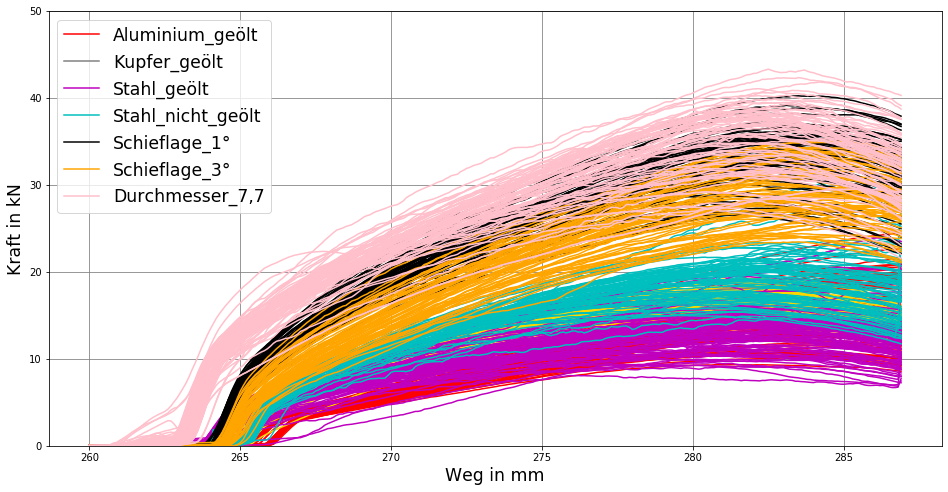

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.xlabel("Weg in mm", fontsize="xx-large")
plt.ylabel("Kraft in kN", fontsize="xx-large")
plt.ylim(0,50)

for i in range(0, Bereich_Aluminium_geölt+1):
    plt.plot(x_weg, y_kraft[i], "r")
plt.plot(x_weg, y_kraft[0], "r", label="Aluminium_geölt")    


for i in range(Bereich_Aluminium_geölt+1, Bereich_Kupfer_geölt+1):
    plt.plot(x_weg, y_kraft[i], "gold")
plt.plot(x_weg, y_kraft[Bereich_Aluminium_geölt+1], "grey", label="Kupfer_geölt")
  
    
for i in range(Bereich_Kupfer_geölt+1, Bereich_Stahl_geölt+1):
    plt.plot(x_weg, y_kraft[i], "m")
plt.plot(x_weg, y_kraft[Bereich_Kupfer_geölt+1], "m", label="Stahl_geölt")


for i in range(Bereich_Stahl_geölt+1, Bereich_Stahl_nicht_geölt+1):
    plt.plot(x_weg, y_kraft[i], "c")   
plt.plot(x_weg, y_kraft[Bereich_Stahl_geölt+1], "c", label="Stahl_nicht_geölt")    


for i in range(Bereich_Stahl_nicht_geölt+1, Bereich_Schieflage_1+1):
    plt.plot(x_weg, y_kraft[i], "k")   
plt.plot(x_weg, y_kraft[Bereich_Stahl_nicht_geölt+1], "k", label="Schieflage_1°")   


for i in range(Bereich_Schieflage_1+1, Bereich_Schieflage_3+1):
    plt.plot(x_weg, y_kraft[i], "orange")   
plt.plot(x_weg, y_kraft[Bereich_Schieflage_1+1], "orange", label="Schieflage_3°") 


for i in range(Bereich_Schieflage_3+1, Bereich_Durchmesser_77+1):
    plt.plot(x_weg, y_kraft[i], "pink")   
plt.plot(x_weg, y_kraft[Bereich_Schieflage_3+1], "pink", label="Durchmesser_7,7")   


plt.legend(loc='upper left', fontsize="xx-large")
plt.grid(color="grey", linestyle='-')
plt.show()


In [6]:
### X: Kraftverlaufsmatrix
X = y_kraft

### Y: label der Klassen
Y = df["Klassennummer"].values[:anzahl_zeile]

print(Y.shape)
print(X.shape)
print(X[1])
print(Y)

(551,)
(551, 270)
[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.1095005
  0.1185993   0.1095005   0.1095005   0.1186553   0.1186553   0.1095
  0.1186553   0.1186553   0.1186553   0.1095      0.1186553   0.1186553
  0.1186553   0.1186553   0.1186553   0.1186553   0.1733366   0.40134221
  0.72968018  1.08535898  1.44116294  1.78781199  2.10699511  2.42617798
  2.69995999  2.92783999  3.1011641   3.21980691  3.29267406  3.33845091
  3.38397598  3.438658    3.49333906  3.56645608  3.6211369   3.69412899
  3.73965502  3.80349207  3.87648392  3.94032001  4.02234221  4.08630419
  4.16845083  

In [7]:
from keras.utils import to_categorical

Y = to_categorical(Y)

print(Y)

Using TensorFlow backend.


[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [8]:
kraft_sequenz = 50
anzahl_sequenzen = len(x_weg) - kraft_sequenz
###                   270   -     50  

X_train_seq = []   
    
# bilden von sequenzen in den zeilen
for i in range(0, len(X)):
    for j in range(0, anzahl_sequenzen):
        X_train_seq.append(X[i][j:j + kraft_sequenz])

        
X_train_seq = np.array(X_train_seq).reshape(anzahl_zeile, anzahl_sequenzen, kraft_sequenz)

print(X_train_seq.shape)
print(Y.shape)


(551, 220, 50)
(551, 7)


In [16]:
from sklearn.model_selection import train_test_split

#random_state: wenn "None"-> zufällige Auswahl der Daten.
#              wenn eine Zahl(int)-> bestimmte Auswahl der Daten.
#shuffle: zuständig für Durchmischen der Reihenfolge der Daten(immer auf True setzen)

x_train, x_test, y_train, y_test = train_test_split(X_train_seq, Y, random_state=1, test_size=0.2, shuffle=True)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(440, 220, 50)
(111, 220, 50)
(440, 7)
(111, 7)


In [17]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, LSTM, Flatten, MaxPooling1D, Dropout
from keras.callbacks import EarlyStopping

In [18]:
es = EarlyStopping(monitor="loss", patience=50, verbose=1)

def get_model():
        
    model = Sequential()

    model.add(LSTM(32, return_sequences=True, use_bias=True, input_shape=(anzahl_sequenzen, kraft_sequenz)))
    model.add(MaxPooling1D(3))                                                 
    
    model.add(LSTM(16, return_sequences=True, use_bias=True))
    model.add(MaxPooling1D(3))

    model.add(Dropout(0.25))

    model.add(Flatten())

    model.add(Dense(200, activation="relu"))
    model.add(Dense(100, activation="relu"))

    model.add(Dropout(0.25))

    model.add(Dense(7, activation="softmax")) 

    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

    return model

model = get_model()
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 220, 32)           10624     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 73, 32)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 73, 16)            3136      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 24, 16)            0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 24, 16)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 200)              

In [19]:
history = model.fit(x_train, y_train, epochs=200, batch_size=1024, validation_split=0.2, callbacks=[es])

Train on 352 samples, validate on 88 samples
Epoch 1/200
352/352 [==============================] - 1s 3ms/step - loss: 1.9613 - accuracy: 0.1648 - val_loss: 1.8894 - val_accuracy: 0.2500
Epoch 2/200
352/352 [==============================] - 1s 1ms/step - loss: 1.9108 - accuracy: 0.1875 - val_loss: 1.8350 - val_accuracy: 0.3182
Epoch 3/200
352/352 [==============================] - 1s 1ms/step - loss: 1.8620 - accuracy: 0.2642 - val_loss: 1.7672 - val_accuracy: 0.3295
Epoch 4/200
352/352 [==============================] - 1s 1ms/step - loss: 1.7818 - accuracy: 0.3182 - val_loss: 1.6929 - val_accuracy: 0.3182
Epoch 5/200
352/352 [==============================] - 1s 1ms/step - loss: 1.7197 - accuracy: 0.3352 - val_loss: 1.6180 - val_accuracy: 0.3182
Epoch 6/200
352/352 [==============================] - 1s 1ms/step - loss: 1.6370 - accuracy: 0.3835 - val_loss: 1.5303 - val_accuracy: 0.5568
Epoch 7/200
352/352 [==============================] - 1s 2ms/step - loss: 1.5427 - accuracy: 0.5

Epoch 58/200
352/352 [==============================] - 1s 2ms/step - loss: 0.2176 - accuracy: 0.9148 - val_loss: 0.2928 - val_accuracy: 0.9091
Epoch 59/200
352/352 [==============================] - 1s 2ms/step - loss: 0.2086 - accuracy: 0.9261 - val_loss: 0.2244 - val_accuracy: 0.9091
Epoch 60/200
352/352 [==============================] - 1s 1ms/step - loss: 0.1815 - accuracy: 0.9261 - val_loss: 0.2198 - val_accuracy: 0.9432
Epoch 61/200
352/352 [==============================] - 1s 2ms/step - loss: 0.2187 - accuracy: 0.9091 - val_loss: 0.2551 - val_accuracy: 0.9318
Epoch 62/200
352/352 [==============================] - 1s 1ms/step - loss: 0.2052 - accuracy: 0.9148 - val_loss: 0.2147 - val_accuracy: 0.8977
Epoch 63/200
352/352 [==============================] - 1s 1ms/step - loss: 0.2011 - accuracy: 0.9119 - val_loss: 0.2519 - val_accuracy: 0.9205
Epoch 64/200
352/352 [==============================] - 1s 2ms/step - loss: 0.1568 - accuracy: 0.9432 - val_loss: 0.1794 - val_accuracy:

Epoch 115/200
352/352 [==============================] - 1s 2ms/step - loss: 0.0877 - accuracy: 0.9688 - val_loss: 0.1807 - val_accuracy: 0.9545
Epoch 116/200
352/352 [==============================] - 1s 2ms/step - loss: 0.0836 - accuracy: 0.9659 - val_loss: 0.1891 - val_accuracy: 0.9318
Epoch 117/200
352/352 [==============================] - 1s 2ms/step - loss: 0.0925 - accuracy: 0.9602 - val_loss: 0.1667 - val_accuracy: 0.9545
Epoch 118/200
352/352 [==============================] - 1s 2ms/step - loss: 0.0997 - accuracy: 0.9602 - val_loss: 0.1641 - val_accuracy: 0.9659
Epoch 119/200
352/352 [==============================] - 1s 2ms/step - loss: 0.0973 - accuracy: 0.9659 - val_loss: 0.1487 - val_accuracy: 0.9659
Epoch 120/200
352/352 [==============================] - 1s 2ms/step - loss: 0.1059 - accuracy: 0.9688 - val_loss: 0.1443 - val_accuracy: 0.9432
Epoch 121/200
352/352 [==============================] - 1s 2ms/step - loss: 0.1104 - accuracy: 0.9631 - val_loss: 0.1461 - val_ac

Epoch 172/200
352/352 [==============================] - 1s 2ms/step - loss: 0.0605 - accuracy: 0.9744 - val_loss: 0.0761 - val_accuracy: 0.9773
Epoch 173/200
352/352 [==============================] - 1s 2ms/step - loss: 0.0568 - accuracy: 0.9801 - val_loss: 0.0969 - val_accuracy: 0.9773
Epoch 174/200
352/352 [==============================] - 1s 2ms/step - loss: 0.0603 - accuracy: 0.9716 - val_loss: 0.1431 - val_accuracy: 0.9318
Epoch 175/200
352/352 [==============================] - 1s 2ms/step - loss: 0.0883 - accuracy: 0.9659 - val_loss: 0.1091 - val_accuracy: 0.9659
Epoch 176/200
352/352 [==============================] - 1s 2ms/step - loss: 0.0604 - accuracy: 0.9744 - val_loss: 0.0771 - val_accuracy: 0.9886
Epoch 177/200
352/352 [==============================] - 1s 2ms/step - loss: 0.0649 - accuracy: 0.9773 - val_loss: 0.0664 - val_accuracy: 0.9773
Epoch 178/200
352/352 [==============================] - 1s 2ms/step - loss: 0.0770 - accuracy: 0.9688 - val_loss: 0.0525 - val_ac

In [20]:
print(model.evaluate(x_test, y_test))

111/111 [==============================] - 0s 1ms/step
[0.07285149085024993, 0.9639639854431152]


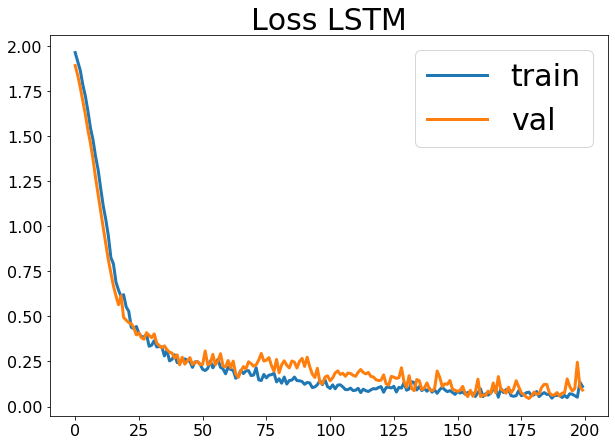

In [25]:
plt.figure(figsize=(10,7))
plt.title('Loss LSTM', fontsize=30)
plt.plot(history.history['loss'], label='train', linewidth=3)
plt.plot(history.history['val_loss'], label='val', linewidth=3)
plt.legend(loc='upper right', fontsize=30)
plt.tick_params(axis="x", labelsize=16)
plt.tick_params(axis="y", labelsize=16)
plt.show()

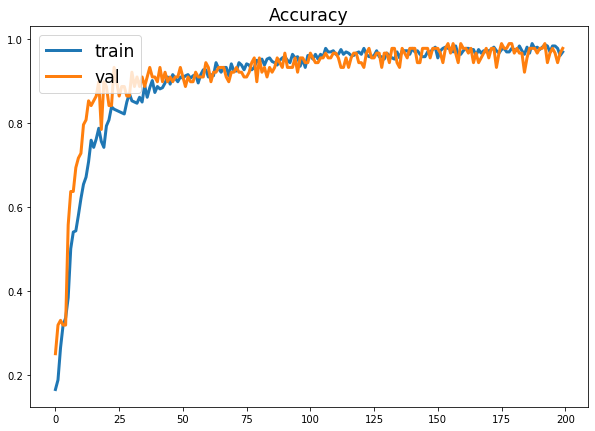

In [22]:
plt.figure(figsize=(10, 7))
plt.title('Accuracy', fontsize="xx-large")
plt.plot(history.history['accuracy'], label='train', linewidth=3)
plt.plot(history.history['val_accuracy'], label='val', linewidth=3)
plt.legend(loc='upper left', fontsize="xx-large")
plt.show()

In [23]:
from pandas_ml import ConfusionMatrix

pred_classes = model.predict_classes(x_test)
print(pred_classes)

y_converted = np.argmax(y_test, axis=1)
print(y_converted)

ConfusionMatrix(y_converted, pred_classes)

[1 3 0 5 1 2 3 3 3 4 5 6 2 6 2 3 5 6 0 0 0 4 5 6 4 6 4 1 6 0 0 4 2 4 6 5 1
 1 5 0 5 5 1 2 0 2 1 2 4 0 2 6 6 0 5 5 2 4 5 2 5 5 0 1 5 0 2 5 2 2 2 2 5 6
 4 2 6 2 6 0 0 6 1 0 5 4 4 3 0 2 6 3 3 2 0 6 5 1 6 0 5 4 0 5 6 5 4 0 2 1 2]
[1 3 0 5 1 2 3 3 3 4 5 6 2 6 2 3 5 6 0 0 0 4 5 6 4 6 4 1 6 0 1 4 2 4 6 5 1
 1 5 0 4 5 1 2 0 2 1 2 4 0 2 6 6 0 5 5 2 4 5 2 5 5 0 3 4 0 2 5 2 2 2 2 5 6
 4 2 6 2 6 0 0 6 1 0 5 4 4 3 0 2 6 3 3 2 0 6 5 1 6 0 5 4 0 5 6 5 4 0 2 1 2]


Predicted   0   1   2  3   4   5   6  __all__
Actual                                       
0          19   0   0  0   0   0   0       19
1           1  10   0  0   0   0   0       11
2           0   0  21  0   0   0   0       21
3           0   1   0  8   0   0   0        9
4           0   0   0  0  13   2   0       15
5           0   0   0  0   0  19   0       19
6           0   0   0  0   0   0  17       17
__all__    20  11  21  8  13  21  17      111

In [24]:
from sklearn.metrics import classification_report

report = classification_report(y_converted, pred_classes)
print(report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       0.91      0.91      0.91        11
           2       1.00      1.00      1.00        21
           3       1.00      0.89      0.94         9
           4       1.00      0.87      0.93        15
           5       0.90      1.00      0.95        19
           6       1.00      1.00      1.00        17

    accuracy                           0.96       111
   macro avg       0.97      0.95      0.96       111
weighted avg       0.97      0.96      0.96       111



In [27]:
from sklearn.metrics import f1_score

test_acc = []
micro_f1 = []
macro_f1 = []
weighted_f1 = []

for i in range(0, 20):

    X_train, X_test, Y_train, Y_test = train_test_split(X_train_seq, Y, random_state=None, test_size=0.2, shuffle=True)


    model_final= Sequential()

    model_final.add(LSTM(32, return_sequences=True, use_bias=True, input_shape=(anzahl_sequenzen, kraft_sequenz)))
    model_final.add(MaxPooling1D(3))                                                 
    
    model_final.add(LSTM(16, return_sequences=True, use_bias=True))
    model_final.add(MaxPooling1D(3))

    model_final.add(Dropout(0.25))
    model_final.add(Flatten())

    model_final.add(Dense(200, activation="relu"))
    model_final.add(Dense(100, activation="relu"))
    model_final.add(Dropout(0.25))
    model_final.add(Dense(7, activation="softmax")) 

    model_final.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

    es = EarlyStopping(monitor="loss", patience=50, verbose=1)   

    print([i],"ter Druchlauf")
    history = model_final.fit(X_train, Y_train, epochs=200, batch_size=1024, validation_split=0.2, callbacks=[es])
    
    
    test_acc.append(model_final.evaluate(X_test, Y_test))
    
    Pred_Classes = model_final.predict_classes(X_test)
    Y_converted = np.argmax(Y_test, axis=1)
    micro_f1.append(f1_score(Y_converted, Pred_Classes, average='micro'))
    macro_f1.append(f1_score(Y_converted, Pred_Classes, average='macro'))
    weighted_f1.append(f1_score(Y_converted, Pred_Classes, average='weighted'))
    
    print(model_final.evaluate(X_test, Y_test))
    model_final.reset_states()
    print("------------------------------------------------------------------------------------------------------------------------")

[0] ter Druchlauf
Train on 352 samples, validate on 88 samples
Epoch 1/200
352/352 [==============================] - 1s 3ms/step - loss: 1.9959 - accuracy: 0.1562 - val_loss: 1.8603 - val_accuracy: 0.2955
Epoch 2/200
352/352 [==============================] - 1s 1ms/step - loss: 1.8827 - accuracy: 0.2841 - val_loss: 1.8147 - val_accuracy: 0.3182
Epoch 3/200
352/352 [==============================] - 0s 1ms/step - loss: 1.8506 - accuracy: 0.3267 - val_loss: 1.7516 - val_accuracy: 0.3409
Epoch 4/200
352/352 [==============================] - 0s 1ms/step - loss: 1.7961 - accuracy: 0.3807 - val_loss: 1.6861 - val_accuracy: 0.5114
Epoch 5/200
352/352 [==============================] - 0s 1ms/step - loss: 1.7351 - accuracy: 0.4460 - val_loss: 1.6034 - val_accuracy: 0.5114
Epoch 6/200
352/352 [==============================] - 0s 1ms/step - loss: 1.6491 - accuracy: 0.4517 - val_loss: 1.5148 - val_accuracy: 0.6023
Epoch 7/200
352/352 [==============================] - 1s 1ms/step - loss: 1.56

Epoch 58/200
352/352 [==============================] - 1s 2ms/step - loss: 0.1966 - accuracy: 0.9176 - val_loss: 0.2289 - val_accuracy: 0.9091
Epoch 59/200
352/352 [==============================] - 1s 1ms/step - loss: 0.2192 - accuracy: 0.9119 - val_loss: 0.1927 - val_accuracy: 0.9205
Epoch 60/200
352/352 [==============================] - 1s 2ms/step - loss: 0.1940 - accuracy: 0.9233 - val_loss: 0.1910 - val_accuracy: 0.9205
Epoch 61/200
352/352 [==============================] - 1s 1ms/step - loss: 0.1937 - accuracy: 0.9347 - val_loss: 0.1731 - val_accuracy: 0.9091
Epoch 62/200
352/352 [==============================] - 0s 1ms/step - loss: 0.2047 - accuracy: 0.9148 - val_loss: 0.1931 - val_accuracy: 0.9091
Epoch 63/200
352/352 [==============================] - 1s 1ms/step - loss: 0.2003 - accuracy: 0.9261 - val_loss: 0.1749 - val_accuracy: 0.9091
Epoch 64/200
352/352 [==============================] - 1s 2ms/step - loss: 0.1810 - accuracy: 0.9318 - val_loss: 0.1817 - val_accuracy:

Epoch 115/200
352/352 [==============================] - 1s 2ms/step - loss: 0.1170 - accuracy: 0.9545 - val_loss: 0.1245 - val_accuracy: 0.9432
Epoch 116/200
352/352 [==============================] - 1s 2ms/step - loss: 0.1266 - accuracy: 0.9403 - val_loss: 0.0990 - val_accuracy: 0.9432
Epoch 117/200
352/352 [==============================] - 1s 2ms/step - loss: 0.1050 - accuracy: 0.9631 - val_loss: 0.0839 - val_accuracy: 0.9659
Epoch 118/200
352/352 [==============================] - 1s 2ms/step - loss: 0.1189 - accuracy: 0.9517 - val_loss: 0.0809 - val_accuracy: 0.9545
Epoch 119/200
352/352 [==============================] - 1s 2ms/step - loss: 0.1035 - accuracy: 0.9602 - val_loss: 0.0998 - val_accuracy: 0.9432
Epoch 120/200
352/352 [==============================] - 1s 2ms/step - loss: 0.1032 - accuracy: 0.9545 - val_loss: 0.1226 - val_accuracy: 0.9432
Epoch 121/200
352/352 [==============================] - 1s 2ms/step - loss: 0.0939 - accuracy: 0.9602 - val_loss: 0.1275 - val_ac

Epoch 172/200
352/352 [==============================] - 1s 2ms/step - loss: 0.0855 - accuracy: 0.9773 - val_loss: 0.1276 - val_accuracy: 0.9545
Epoch 173/200
352/352 [==============================] - 1s 2ms/step - loss: 0.0576 - accuracy: 0.9744 - val_loss: 0.1227 - val_accuracy: 0.9432
Epoch 174/200
352/352 [==============================] - 1s 2ms/step - loss: 0.0741 - accuracy: 0.9659 - val_loss: 0.1144 - val_accuracy: 0.9432
Epoch 175/200
352/352 [==============================] - 1s 2ms/step - loss: 0.0669 - accuracy: 0.9744 - val_loss: 0.1352 - val_accuracy: 0.9432
Epoch 176/200
352/352 [==============================] - 1s 2ms/step - loss: 0.0684 - accuracy: 0.9716 - val_loss: 0.1311 - val_accuracy: 0.9659
Epoch 177/200
352/352 [==============================] - 1s 2ms/step - loss: 0.0643 - accuracy: 0.9688 - val_loss: 0.1134 - val_accuracy: 0.9773
Epoch 178/200
352/352 [==============================] - 1s 2ms/step - loss: 0.0611 - accuracy: 0.9801 - val_loss: 0.1141 - val_ac

Epoch 27/200
352/352 [==============================] - 1s 2ms/step - loss: 0.4846 - accuracy: 0.8125 - val_loss: 0.3334 - val_accuracy: 0.8977
Epoch 28/200
352/352 [==============================] - 1s 2ms/step - loss: 0.4312 - accuracy: 0.8381 - val_loss: 0.3016 - val_accuracy: 0.9091
Epoch 29/200
352/352 [==============================] - 1s 2ms/step - loss: 0.4793 - accuracy: 0.7955 - val_loss: 0.2678 - val_accuracy: 0.9205
Epoch 30/200
352/352 [==============================] - 1s 1ms/step - loss: 0.4170 - accuracy: 0.8381 - val_loss: 0.2493 - val_accuracy: 0.9318
Epoch 31/200
352/352 [==============================] - 1s 2ms/step - loss: 0.3804 - accuracy: 0.8551 - val_loss: 0.2481 - val_accuracy: 0.9205
Epoch 32/200
352/352 [==============================] - 1s 2ms/step - loss: 0.3756 - accuracy: 0.8665 - val_loss: 0.2470 - val_accuracy: 0.9318
Epoch 33/200
352/352 [==============================] - 1s 2ms/step - loss: 0.3954 - accuracy: 0.8551 - val_loss: 0.2453 - val_accuracy:

Epoch 84/200
352/352 [==============================] - 1s 2ms/step - loss: 0.1044 - accuracy: 0.9659 - val_loss: 0.0733 - val_accuracy: 0.9886
Epoch 85/200
352/352 [==============================] - 1s 2ms/step - loss: 0.1156 - accuracy: 0.9545 - val_loss: 0.0884 - val_accuracy: 0.9545
Epoch 86/200
352/352 [==============================] - 1s 2ms/step - loss: 0.1051 - accuracy: 0.9602 - val_loss: 0.1856 - val_accuracy: 0.9545
Epoch 87/200
352/352 [==============================] - 1s 2ms/step - loss: 0.1618 - accuracy: 0.9290 - val_loss: 0.1906 - val_accuracy: 0.9545
Epoch 88/200
352/352 [==============================] - 1s 2ms/step - loss: 0.1944 - accuracy: 0.9261 - val_loss: 0.0940 - val_accuracy: 0.9545
Epoch 89/200
352/352 [==============================] - 1s 2ms/step - loss: 0.1598 - accuracy: 0.9432 - val_loss: 0.1729 - val_accuracy: 0.9318
Epoch 90/200
352/352 [==============================] - 1s 2ms/step - loss: 0.1666 - accuracy: 0.9318 - val_loss: 0.1111 - val_accuracy:

Epoch 141/200
352/352 [==============================] - 1s 2ms/step - loss: 0.1419 - accuracy: 0.9545 - val_loss: 0.1982 - val_accuracy: 0.9545
Epoch 142/200
352/352 [==============================] - 1s 2ms/step - loss: 0.1129 - accuracy: 0.9631 - val_loss: 0.2072 - val_accuracy: 0.9432
Epoch 143/200
352/352 [==============================] - 1s 1ms/step - loss: 0.1271 - accuracy: 0.9517 - val_loss: 0.1791 - val_accuracy: 0.9545
Epoch 144/200
352/352 [==============================] - 1s 2ms/step - loss: 0.1210 - accuracy: 0.9460 - val_loss: 0.0953 - val_accuracy: 0.9773
Epoch 145/200
352/352 [==============================] - 1s 2ms/step - loss: 0.0675 - accuracy: 0.9773 - val_loss: 0.1299 - val_accuracy: 0.9432
Epoch 146/200
352/352 [==============================] - 1s 2ms/step - loss: 0.1971 - accuracy: 0.9460 - val_loss: 0.1475 - val_accuracy: 0.9545
Epoch 147/200
352/352 [==============================] - 1s 2ms/step - loss: 0.0694 - accuracy: 0.9716 - val_loss: 0.2232 - val_ac

Epoch 198/200
352/352 [==============================] - 1s 2ms/step - loss: 0.0503 - accuracy: 0.9801 - val_loss: 0.1664 - val_accuracy: 0.9545
Epoch 199/200
352/352 [==============================] - 1s 2ms/step - loss: 0.0492 - accuracy: 0.9773 - val_loss: 0.1379 - val_accuracy: 0.9659
Epoch 200/200
111/111 [==============================] - 0s 1ms/step
[0.15097338269959698, 0.9639639854431152]
------------------------------------------------------------------------------------------------------------------------
[2] ter Druchlauf
Train on 352 samples, validate on 88 samples
Epoch 1/200
352/352 [==============================] - 1s 4ms/step - loss: 1.9880 - accuracy: 0.1051 - val_loss: 1.8735 - val_accuracy: 0.2159
Epoch 2/200
352/352 [==============================] - 1s 2ms/step - loss: 1.8873 - accuracy: 0.2528 - val_loss: 1.8154 - val_accuracy: 0.5227
Epoch 3/200
352/352 [==============================] - 1s 2ms/step - loss: 1.8063 - accuracy: 0.3608 - val_loss: 1.8270 - val_acc

Epoch 53/200
352/352 [==============================] - 1s 2ms/step - loss: 0.2331 - accuracy: 0.9034 - val_loss: 0.1661 - val_accuracy: 0.9545
Epoch 54/200
352/352 [==============================] - 1s 2ms/step - loss: 0.2055 - accuracy: 0.9205 - val_loss: 0.1429 - val_accuracy: 0.9773
Epoch 55/200
352/352 [==============================] - 1s 2ms/step - loss: 0.2148 - accuracy: 0.9034 - val_loss: 0.2209 - val_accuracy: 0.9318
Epoch 56/200
352/352 [==============================] - 1s 2ms/step - loss: 0.1760 - accuracy: 0.9233 - val_loss: 0.3241 - val_accuracy: 0.8977
Epoch 57/200
352/352 [==============================] - 1s 2ms/step - loss: 0.2137 - accuracy: 0.9205 - val_loss: 0.2248 - val_accuracy: 0.9318
Epoch 58/200
352/352 [==============================] - 1s 2ms/step - loss: 0.1546 - accuracy: 0.9261 - val_loss: 0.1583 - val_accuracy: 0.9659
Epoch 59/200
352/352 [==============================] - 1s 2ms/step - loss: 0.1662 - accuracy: 0.9205 - val_loss: 0.1637 - val_accuracy:

Epoch 110/200
352/352 [==============================] - 1s 2ms/step - loss: 0.0816 - accuracy: 0.9744 - val_loss: 0.2265 - val_accuracy: 0.9318
Epoch 111/200
352/352 [==============================] - 1s 2ms/step - loss: 0.0630 - accuracy: 0.9773 - val_loss: 0.1600 - val_accuracy: 0.9773
Epoch 112/200
352/352 [==============================] - 1s 2ms/step - loss: 0.0578 - accuracy: 0.9801 - val_loss: 0.1662 - val_accuracy: 0.9545
Epoch 113/200
352/352 [==============================] - 1s 2ms/step - loss: 0.0743 - accuracy: 0.9688 - val_loss: 0.3408 - val_accuracy: 0.9205
Epoch 114/200
352/352 [==============================] - 1s 2ms/step - loss: 0.0857 - accuracy: 0.9631 - val_loss: 0.2553 - val_accuracy: 0.9318
Epoch 115/200
352/352 [==============================] - 1s 2ms/step - loss: 0.1071 - accuracy: 0.9631 - val_loss: 0.1938 - val_accuracy: 0.9432
Epoch 116/200
352/352 [==============================] - 1s 2ms/step - loss: 0.0584 - accuracy: 0.9801 - val_loss: 0.2584 - val_ac

Epoch 167/200
352/352 [==============================] - 1s 2ms/step - loss: 0.0263 - accuracy: 0.9915 - val_loss: 0.2351 - val_accuracy: 0.9432
Epoch 168/200
352/352 [==============================] - 1s 2ms/step - loss: 0.0381 - accuracy: 0.9915 - val_loss: 0.2020 - val_accuracy: 0.9659
Epoch 169/200
352/352 [==============================] - 1s 2ms/step - loss: 0.0378 - accuracy: 0.9858 - val_loss: 0.2032 - val_accuracy: 0.9545
Epoch 170/200
352/352 [==============================] - 1s 2ms/step - loss: 0.0245 - accuracy: 0.9943 - val_loss: 0.2266 - val_accuracy: 0.9432
Epoch 171/200
352/352 [==============================] - 1s 2ms/step - loss: 0.0290 - accuracy: 0.9915 - val_loss: 0.2083 - val_accuracy: 0.9545
Epoch 172/200
352/352 [==============================] - 1s 2ms/step - loss: 0.0273 - accuracy: 0.9886 - val_loss: 0.1891 - val_accuracy: 0.9545
Epoch 173/200
352/352 [==============================] - 1s 2ms/step - loss: 0.0245 - accuracy: 0.9915 - val_loss: 0.2040 - val_ac

Epoch 22/200
352/352 [==============================] - 1s 3ms/step - loss: 0.6401 - accuracy: 0.7472 - val_loss: 0.4443 - val_accuracy: 0.9091
Epoch 23/200
352/352 [==============================] - 1s 3ms/step - loss: 0.6436 - accuracy: 0.7301 - val_loss: 0.4079 - val_accuracy: 0.9432
Epoch 24/200
352/352 [==============================] - 1s 3ms/step - loss: 0.5436 - accuracy: 0.8011 - val_loss: 0.3799 - val_accuracy: 0.9432
Epoch 25/200
352/352 [==============================] - 1s 3ms/step - loss: 0.5035 - accuracy: 0.7812 - val_loss: 0.3518 - val_accuracy: 0.9205
Epoch 26/200
352/352 [==============================] - 1s 3ms/step - loss: 0.5129 - accuracy: 0.7642 - val_loss: 0.3330 - val_accuracy: 0.9091
Epoch 27/200
352/352 [==============================] - 1s 3ms/step - loss: 0.4810 - accuracy: 0.7983 - val_loss: 0.3024 - val_accuracy: 0.9545
Epoch 28/200
352/352 [==============================] - 1s 3ms/step - loss: 0.4270 - accuracy: 0.8210 - val_loss: 0.2826 - val_accuracy:

Epoch 79/200
352/352 [==============================] - 1s 2ms/step - loss: 0.1995 - accuracy: 0.9176 - val_loss: 0.1213 - val_accuracy: 0.9659
Epoch 80/200
352/352 [==============================] - 1s 3ms/step - loss: 0.1513 - accuracy: 0.9347 - val_loss: 0.1189 - val_accuracy: 0.9659
Epoch 81/200
352/352 [==============================] - 1s 3ms/step - loss: 0.1814 - accuracy: 0.9176 - val_loss: 0.1073 - val_accuracy: 0.9659
Epoch 82/200
352/352 [==============================] - 1s 3ms/step - loss: 0.1532 - accuracy: 0.9517 - val_loss: 0.1799 - val_accuracy: 0.9318
Epoch 83/200
352/352 [==============================] - 1s 2ms/step - loss: 0.1839 - accuracy: 0.9205 - val_loss: 0.1168 - val_accuracy: 0.9773
Epoch 84/200
352/352 [==============================] - 1s 2ms/step - loss: 0.1501 - accuracy: 0.9347 - val_loss: 0.1282 - val_accuracy: 0.9659
Epoch 85/200
352/352 [==============================] - 1s 3ms/step - loss: 0.2030 - accuracy: 0.9176 - val_loss: 0.1171 - val_accuracy:

Epoch 136/200
352/352 [==============================] - 1s 3ms/step - loss: 0.1030 - accuracy: 0.9545 - val_loss: 0.1211 - val_accuracy: 0.9659
Epoch 137/200
352/352 [==============================] - 1s 3ms/step - loss: 0.1009 - accuracy: 0.9574 - val_loss: 0.1238 - val_accuracy: 0.9659
Epoch 138/200
352/352 [==============================] - 1s 3ms/step - loss: 0.0938 - accuracy: 0.9716 - val_loss: 0.1263 - val_accuracy: 0.9773
Epoch 139/200
352/352 [==============================] - 1s 3ms/step - loss: 0.0984 - accuracy: 0.9716 - val_loss: 0.1474 - val_accuracy: 0.9545
Epoch 140/200
352/352 [==============================] - 1s 3ms/step - loss: 0.0976 - accuracy: 0.9545 - val_loss: 0.1255 - val_accuracy: 0.9773
Epoch 141/200
352/352 [==============================] - 1s 3ms/step - loss: 0.1059 - accuracy: 0.9602 - val_loss: 0.1202 - val_accuracy: 0.9659
Epoch 142/200
352/352 [==============================] - 1s 3ms/step - loss: 0.1031 - accuracy: 0.9631 - val_loss: 0.1237 - val_ac

Epoch 193/200
352/352 [==============================] - 1s 3ms/step - loss: 0.0511 - accuracy: 0.9773 - val_loss: 0.0997 - val_accuracy: 0.9773
Epoch 194/200
352/352 [==============================] - 1s 3ms/step - loss: 0.0575 - accuracy: 0.9801 - val_loss: 0.1387 - val_accuracy: 0.9659
Epoch 195/200
352/352 [==============================] - 1s 3ms/step - loss: 0.1347 - accuracy: 0.9489 - val_loss: 0.1557 - val_accuracy: 0.9545
Epoch 196/200
352/352 [==============================] - 1s 2ms/step - loss: 0.2137 - accuracy: 0.9290 - val_loss: 0.1183 - val_accuracy: 0.9659
Epoch 197/200
352/352 [==============================] - 1s 2ms/step - loss: 0.1019 - accuracy: 0.9688 - val_loss: 0.1599 - val_accuracy: 0.9545
Epoch 198/200
352/352 [==============================] - 1s 3ms/step - loss: 0.1678 - accuracy: 0.9460 - val_loss: 0.0856 - val_accuracy: 0.9773
Epoch 199/200
352/352 [==============================] - 1s 3ms/step - loss: 0.0899 - accuracy: 0.9716 - val_loss: 0.0875 - val_ac

Epoch 48/200
352/352 [==============================] - 1s 2ms/step - loss: 0.1911 - accuracy: 0.9347 - val_loss: 0.2930 - val_accuracy: 0.8750
Epoch 49/200
352/352 [==============================] - 1s 3ms/step - loss: 0.1820 - accuracy: 0.9318 - val_loss: 0.2418 - val_accuracy: 0.8750
Epoch 50/200
352/352 [==============================] - 1s 3ms/step - loss: 0.1881 - accuracy: 0.9233 - val_loss: 0.2043 - val_accuracy: 0.9205
Epoch 51/200
352/352 [==============================] - 1s 2ms/step - loss: 0.1754 - accuracy: 0.9290 - val_loss: 0.2010 - val_accuracy: 0.9205
Epoch 52/200
352/352 [==============================] - 1s 3ms/step - loss: 0.1947 - accuracy: 0.9261 - val_loss: 0.2243 - val_accuracy: 0.8977
Epoch 53/200
352/352 [==============================] - 1s 3ms/step - loss: 0.1513 - accuracy: 0.9403 - val_loss: 0.2356 - val_accuracy: 0.8977
Epoch 54/200
352/352 [==============================] - 1s 3ms/step - loss: 0.1624 - accuracy: 0.9290 - val_loss: 0.2071 - val_accuracy:

Epoch 105/200
352/352 [==============================] - 1s 2ms/step - loss: 0.1498 - accuracy: 0.9432 - val_loss: 0.3336 - val_accuracy: 0.9091
Epoch 106/200
352/352 [==============================] - 1s 3ms/step - loss: 0.1490 - accuracy: 0.9460 - val_loss: 0.2274 - val_accuracy: 0.9318
Epoch 107/200
352/352 [==============================] - 1s 3ms/step - loss: 0.0907 - accuracy: 0.9659 - val_loss: 0.2665 - val_accuracy: 0.9318
Epoch 108/200
352/352 [==============================] - 1s 3ms/step - loss: 0.1059 - accuracy: 0.9716 - val_loss: 0.2473 - val_accuracy: 0.9318
Epoch 109/200
352/352 [==============================] - 1s 3ms/step - loss: 0.0933 - accuracy: 0.9631 - val_loss: 0.3184 - val_accuracy: 0.8977
Epoch 110/200
352/352 [==============================] - 1s 3ms/step - loss: 0.1351 - accuracy: 0.9432 - val_loss: 0.2051 - val_accuracy: 0.9205
Epoch 111/200
352/352 [==============================] - 1s 3ms/step - loss: 0.0896 - accuracy: 0.9659 - val_loss: 0.1845 - val_ac

Epoch 162/200
352/352 [==============================] - 1s 2ms/step - loss: 0.0516 - accuracy: 0.9801 - val_loss: 0.1716 - val_accuracy: 0.9659
Epoch 163/200
352/352 [==============================] - 1s 2ms/step - loss: 0.0461 - accuracy: 0.9830 - val_loss: 0.1798 - val_accuracy: 0.9659
Epoch 164/200
352/352 [==============================] - 1s 2ms/step - loss: 0.0600 - accuracy: 0.9716 - val_loss: 0.1876 - val_accuracy: 0.9432
Epoch 165/200
352/352 [==============================] - 1s 2ms/step - loss: 0.0577 - accuracy: 0.9688 - val_loss: 0.1723 - val_accuracy: 0.9659
Epoch 166/200
352/352 [==============================] - 1s 2ms/step - loss: 0.0408 - accuracy: 0.9886 - val_loss: 0.1679 - val_accuracy: 0.9659
Epoch 167/200
352/352 [==============================] - 1s 3ms/step - loss: 0.0538 - accuracy: 0.9716 - val_loss: 0.1541 - val_accuracy: 0.9659
Epoch 168/200
352/352 [==============================] - 1s 3ms/step - loss: 0.0482 - accuracy: 0.9830 - val_loss: 0.1652 - val_ac

Epoch 17/200
352/352 [==============================] - 1s 3ms/step - loss: 0.8234 - accuracy: 0.7017 - val_loss: 0.7684 - val_accuracy: 0.8750
Epoch 18/200
352/352 [==============================] - 1s 3ms/step - loss: 0.7840 - accuracy: 0.7358 - val_loss: 0.7373 - val_accuracy: 0.8295
Epoch 19/200
352/352 [==============================] - 1s 3ms/step - loss: 0.7255 - accuracy: 0.7443 - val_loss: 0.6466 - val_accuracy: 0.8523
Epoch 20/200
352/352 [==============================] - 1s 3ms/step - loss: 0.6317 - accuracy: 0.7670 - val_loss: 0.6082 - val_accuracy: 0.8182
Epoch 21/200
352/352 [==============================] - 1s 3ms/step - loss: 0.6594 - accuracy: 0.7528 - val_loss: 0.5703 - val_accuracy: 0.8750
Epoch 22/200
352/352 [==============================] - 1s 3ms/step - loss: 0.5821 - accuracy: 0.7784 - val_loss: 0.5513 - val_accuracy: 0.8409
Epoch 23/200
352/352 [==============================] - 1s 3ms/step - loss: 0.5605 - accuracy: 0.7898 - val_loss: 0.5072 - val_accuracy:

Epoch 74/200
352/352 [==============================] - 1s 3ms/step - loss: 0.1693 - accuracy: 0.9347 - val_loss: 0.2126 - val_accuracy: 0.9318
Epoch 75/200
352/352 [==============================] - 1s 3ms/step - loss: 0.1622 - accuracy: 0.9233 - val_loss: 0.2276 - val_accuracy: 0.9318
Epoch 76/200
352/352 [==============================] - 1s 3ms/step - loss: 0.1620 - accuracy: 0.9432 - val_loss: 0.2785 - val_accuracy: 0.9091
Epoch 77/200
352/352 [==============================] - 1s 3ms/step - loss: 0.1661 - accuracy: 0.9261 - val_loss: 0.2413 - val_accuracy: 0.9545
Epoch 78/200
352/352 [==============================] - 1s 3ms/step - loss: 0.1435 - accuracy: 0.9375 - val_loss: 0.2309 - val_accuracy: 0.9545
Epoch 79/200
352/352 [==============================] - 1s 3ms/step - loss: 0.1526 - accuracy: 0.9460 - val_loss: 0.2351 - val_accuracy: 0.9318
Epoch 80/200
352/352 [==============================] - 1s 3ms/step - loss: 0.1452 - accuracy: 0.9545 - val_loss: 0.2560 - val_accuracy:

Epoch 131/200
352/352 [==============================] - 1s 3ms/step - loss: 0.1065 - accuracy: 0.9631 - val_loss: 0.2140 - val_accuracy: 0.9545
Epoch 132/200
352/352 [==============================] - 1s 3ms/step - loss: 0.0970 - accuracy: 0.9602 - val_loss: 0.2244 - val_accuracy: 0.9545
Epoch 133/200
352/352 [==============================] - 1s 2ms/step - loss: 0.1025 - accuracy: 0.9631 - val_loss: 0.2134 - val_accuracy: 0.9432
Epoch 134/200
352/352 [==============================] - 1s 3ms/step - loss: 0.1042 - accuracy: 0.9602 - val_loss: 0.2145 - val_accuracy: 0.9318
Epoch 135/200
352/352 [==============================] - 1s 3ms/step - loss: 0.0950 - accuracy: 0.9688 - val_loss: 0.2126 - val_accuracy: 0.9432
Epoch 136/200
352/352 [==============================] - 1s 3ms/step - loss: 0.0951 - accuracy: 0.9602 - val_loss: 0.2527 - val_accuracy: 0.9545
Epoch 137/200
352/352 [==============================] - 1s 3ms/step - loss: 0.1053 - accuracy: 0.9545 - val_loss: 0.2138 - val_ac

Epoch 188/200
352/352 [==============================] - 1s 3ms/step - loss: 0.0756 - accuracy: 0.9688 - val_loss: 0.2125 - val_accuracy: 0.9318
Epoch 189/200
352/352 [==============================] - 1s 3ms/step - loss: 0.0633 - accuracy: 0.9801 - val_loss: 0.2129 - val_accuracy: 0.9318
Epoch 190/200
352/352 [==============================] - 1s 3ms/step - loss: 0.0758 - accuracy: 0.9716 - val_loss: 0.2035 - val_accuracy: 0.9318
Epoch 191/200
352/352 [==============================] - 1s 3ms/step - loss: 0.0638 - accuracy: 0.9773 - val_loss: 0.2143 - val_accuracy: 0.9432
Epoch 192/200
352/352 [==============================] - 1s 3ms/step - loss: 0.0963 - accuracy: 0.9602 - val_loss: 0.1858 - val_accuracy: 0.9318
Epoch 193/200
352/352 [==============================] - 1s 3ms/step - loss: 0.0900 - accuracy: 0.9716 - val_loss: 0.2267 - val_accuracy: 0.9318
Epoch 194/200
352/352 [==============================] - 1s 3ms/step - loss: 0.0720 - accuracy: 0.9688 - val_loss: 0.2684 - val_ac

Epoch 43/200
352/352 [==============================] - 1s 3ms/step - loss: 0.2568 - accuracy: 0.9006 - val_loss: 0.1944 - val_accuracy: 0.9091
Epoch 44/200
352/352 [==============================] - 1s 3ms/step - loss: 0.2217 - accuracy: 0.9148 - val_loss: 0.2442 - val_accuracy: 0.8864
Epoch 45/200
352/352 [==============================] - 1s 3ms/step - loss: 0.2662 - accuracy: 0.8977 - val_loss: 0.2289 - val_accuracy: 0.8750
Epoch 46/200
352/352 [==============================] - 1s 3ms/step - loss: 0.2432 - accuracy: 0.9119 - val_loss: 0.1918 - val_accuracy: 0.8750
Epoch 47/200
352/352 [==============================] - 1s 3ms/step - loss: 0.2379 - accuracy: 0.9148 - val_loss: 0.1834 - val_accuracy: 0.9091
Epoch 48/200
352/352 [==============================] - 1s 3ms/step - loss: 0.2355 - accuracy: 0.9148 - val_loss: 0.2064 - val_accuracy: 0.9205
Epoch 49/200
352/352 [==============================] - 1s 3ms/step - loss: 0.2357 - accuracy: 0.9062 - val_loss: 0.2015 - val_accuracy:

Epoch 100/200
352/352 [==============================] - 1s 3ms/step - loss: 0.1355 - accuracy: 0.9432 - val_loss: 0.2234 - val_accuracy: 0.9205
Epoch 101/200
352/352 [==============================] - 1s 3ms/step - loss: 0.3074 - accuracy: 0.9034 - val_loss: 0.5660 - val_accuracy: 0.7955
Epoch 102/200
352/352 [==============================] - 1s 3ms/step - loss: 0.5592 - accuracy: 0.7898 - val_loss: 0.4584 - val_accuracy: 0.7955
Epoch 103/200
352/352 [==============================] - 1s 3ms/step - loss: 0.4824 - accuracy: 0.8040 - val_loss: 0.1252 - val_accuracy: 0.9432
Epoch 104/200
352/352 [==============================] - 1s 3ms/step - loss: 0.1216 - accuracy: 0.9517 - val_loss: 0.1524 - val_accuracy: 0.9205
Epoch 105/200
352/352 [==============================] - 1s 3ms/step - loss: 0.2014 - accuracy: 0.9205 - val_loss: 0.2169 - val_accuracy: 0.8864
Epoch 106/200
352/352 [==============================] - 1s 3ms/step - loss: 0.2619 - accuracy: 0.8835 - val_loss: 0.3407 - val_ac

Epoch 157/200
352/352 [==============================] - 1s 3ms/step - loss: 0.0409 - accuracy: 0.9858 - val_loss: 0.0596 - val_accuracy: 0.9773
Epoch 158/200
352/352 [==============================] - 1s 3ms/step - loss: 0.0526 - accuracy: 0.9773 - val_loss: 0.0592 - val_accuracy: 0.9773
Epoch 159/200
352/352 [==============================] - 1s 3ms/step - loss: 0.0508 - accuracy: 0.9773 - val_loss: 0.0736 - val_accuracy: 0.9659
Epoch 160/200
352/352 [==============================] - 1s 3ms/step - loss: 0.0458 - accuracy: 0.9773 - val_loss: 0.0883 - val_accuracy: 0.9545
Epoch 161/200
352/352 [==============================] - 1s 3ms/step - loss: 0.0548 - accuracy: 0.9830 - val_loss: 0.0650 - val_accuracy: 0.9773
Epoch 162/200
352/352 [==============================] - 1s 3ms/step - loss: 0.0595 - accuracy: 0.9773 - val_loss: 0.0661 - val_accuracy: 0.9773
Epoch 163/200
352/352 [==============================] - 1s 3ms/step - loss: 0.0443 - accuracy: 0.9858 - val_loss: 0.0632 - val_ac

Epoch 12/200
352/352 [==============================] - 1s 3ms/step - loss: 0.9637 - accuracy: 0.7244 - val_loss: 0.7480 - val_accuracy: 0.8068
Epoch 13/200
352/352 [==============================] - 1s 3ms/step - loss: 0.8326 - accuracy: 0.7415 - val_loss: 0.6692 - val_accuracy: 0.8295
Epoch 14/200
352/352 [==============================] - 1s 3ms/step - loss: 0.7907 - accuracy: 0.7273 - val_loss: 0.5723 - val_accuracy: 0.8636
Epoch 15/200
352/352 [==============================] - 1s 3ms/step - loss: 0.7124 - accuracy: 0.7670 - val_loss: 0.5526 - val_accuracy: 0.8636
Epoch 16/200
352/352 [==============================] - 1s 3ms/step - loss: 0.6512 - accuracy: 0.7898 - val_loss: 0.4293 - val_accuracy: 0.9432
Epoch 17/200
352/352 [==============================] - 1s 3ms/step - loss: 0.5799 - accuracy: 0.7955 - val_loss: 0.3987 - val_accuracy: 0.9091
Epoch 18/200
352/352 [==============================] - 1s 3ms/step - loss: 0.5575 - accuracy: 0.7756 - val_loss: 0.3516 - val_accuracy:

Epoch 69/200
352/352 [==============================] - 1s 3ms/step - loss: 0.1330 - accuracy: 0.9574 - val_loss: 0.1337 - val_accuracy: 0.9432
Epoch 70/200
352/352 [==============================] - 1s 3ms/step - loss: 0.1225 - accuracy: 0.9460 - val_loss: 0.1455 - val_accuracy: 0.9318
Epoch 71/200
352/352 [==============================] - 1s 3ms/step - loss: 0.1434 - accuracy: 0.9318 - val_loss: 0.1054 - val_accuracy: 0.9432
Epoch 72/200
352/352 [==============================] - 1s 3ms/step - loss: 0.1305 - accuracy: 0.9375 - val_loss: 0.1164 - val_accuracy: 0.9545
Epoch 73/200
352/352 [==============================] - 1s 3ms/step - loss: 0.1372 - accuracy: 0.9489 - val_loss: 0.1138 - val_accuracy: 0.9545
Epoch 74/200
352/352 [==============================] - 1s 3ms/step - loss: 0.1300 - accuracy: 0.9432 - val_loss: 0.1219 - val_accuracy: 0.9545
Epoch 75/200
352/352 [==============================] - 1s 3ms/step - loss: 0.1372 - accuracy: 0.9574 - val_loss: 0.1497 - val_accuracy:

Epoch 126/200
352/352 [==============================] - 1s 3ms/step - loss: 0.0548 - accuracy: 0.9744 - val_loss: 0.0862 - val_accuracy: 0.9659
Epoch 127/200
352/352 [==============================] - 1s 3ms/step - loss: 0.0630 - accuracy: 0.9773 - val_loss: 0.0471 - val_accuracy: 0.9773
Epoch 128/200
352/352 [==============================] - 1s 3ms/step - loss: 0.0679 - accuracy: 0.9688 - val_loss: 0.0443 - val_accuracy: 0.9773
Epoch 129/200
352/352 [==============================] - 1s 3ms/step - loss: 0.0520 - accuracy: 0.9801 - val_loss: 0.0329 - val_accuracy: 0.9886
Epoch 130/200
352/352 [==============================] - 1s 3ms/step - loss: 0.0496 - accuracy: 0.9858 - val_loss: 0.0288 - val_accuracy: 0.9886
Epoch 131/200
352/352 [==============================] - 1s 3ms/step - loss: 0.0433 - accuracy: 0.9886 - val_loss: 0.0329 - val_accuracy: 0.9773
Epoch 132/200
352/352 [==============================] - 1s 3ms/step - loss: 0.0477 - accuracy: 0.9858 - val_loss: 0.0497 - val_ac

Epoch 183/200
352/352 [==============================] - 1s 3ms/step - loss: 0.0752 - accuracy: 0.9688 - val_loss: 0.0396 - val_accuracy: 0.9773
Epoch 184/200
352/352 [==============================] - 1s 3ms/step - loss: 0.0597 - accuracy: 0.9744 - val_loss: 0.0695 - val_accuracy: 0.9659
Epoch 185/200
352/352 [==============================] - 1s 4ms/step - loss: 0.0730 - accuracy: 0.9716 - val_loss: 0.0419 - val_accuracy: 0.9886
Epoch 186/200
352/352 [==============================] - 2s 5ms/step - loss: 0.0620 - accuracy: 0.9716 - val_loss: 0.0246 - val_accuracy: 1.0000
Epoch 187/200
352/352 [==============================] - 2s 5ms/step - loss: 0.0485 - accuracy: 0.9886 - val_loss: 0.0447 - val_accuracy: 0.9659
Epoch 188/200
352/352 [==============================] - 2s 5ms/step - loss: 0.0604 - accuracy: 0.9716 - val_loss: 0.0537 - val_accuracy: 0.9773
Epoch 189/200
352/352 [==============================] - 2s 5ms/step - loss: 0.0600 - accuracy: 0.9744 - val_loss: 0.0372 - val_ac

Epoch 38/200
352/352 [==============================] - 1s 3ms/step - loss: 0.3111 - accuracy: 0.8523 - val_loss: 0.1944 - val_accuracy: 0.9205
Epoch 39/200
352/352 [==============================] - 1s 3ms/step - loss: 0.2640 - accuracy: 0.8864 - val_loss: 0.1787 - val_accuracy: 0.9318
Epoch 40/200
352/352 [==============================] - 1s 3ms/step - loss: 0.2893 - accuracy: 0.8693 - val_loss: 0.1744 - val_accuracy: 0.9432
Epoch 41/200
352/352 [==============================] - 1s 3ms/step - loss: 0.3023 - accuracy: 0.8778 - val_loss: 0.1813 - val_accuracy: 0.9318
Epoch 42/200
352/352 [==============================] - 1s 3ms/step - loss: 0.2667 - accuracy: 0.8892 - val_loss: 0.1630 - val_accuracy: 0.9318
Epoch 43/200
352/352 [==============================] - 1s 3ms/step - loss: 0.2592 - accuracy: 0.8807 - val_loss: 0.1661 - val_accuracy: 0.9205
Epoch 44/200
352/352 [==============================] - 1s 3ms/step - loss: 0.2635 - accuracy: 0.8750 - val_loss: 0.1607 - val_accuracy:

Epoch 95/200
352/352 [==============================] - 1s 3ms/step - loss: 0.1181 - accuracy: 0.9631 - val_loss: 0.0907 - val_accuracy: 0.9545
Epoch 96/200
352/352 [==============================] - 1s 3ms/step - loss: 0.1086 - accuracy: 0.9574 - val_loss: 0.1121 - val_accuracy: 0.9545
Epoch 97/200
352/352 [==============================] - 1s 3ms/step - loss: 0.1206 - accuracy: 0.9460 - val_loss: 0.1013 - val_accuracy: 0.9432
Epoch 98/200
352/352 [==============================] - 1s 3ms/step - loss: 0.1183 - accuracy: 0.9574 - val_loss: 0.0922 - val_accuracy: 0.9432
Epoch 99/200
352/352 [==============================] - 1s 3ms/step - loss: 0.1243 - accuracy: 0.9545 - val_loss: 0.1030 - val_accuracy: 0.9545
Epoch 100/200
352/352 [==============================] - 1s 3ms/step - loss: 0.1276 - accuracy: 0.9432 - val_loss: 0.1190 - val_accuracy: 0.9545
Epoch 101/200
352/352 [==============================] - 1s 3ms/step - loss: 0.0963 - accuracy: 0.9688 - val_loss: 0.1003 - val_accurac

Epoch 152/200
352/352 [==============================] - 1s 3ms/step - loss: 0.0994 - accuracy: 0.9631 - val_loss: 0.1205 - val_accuracy: 0.9545
Epoch 153/200
352/352 [==============================] - 1s 3ms/step - loss: 0.0909 - accuracy: 0.9716 - val_loss: 0.1127 - val_accuracy: 0.9545
Epoch 154/200
352/352 [==============================] - 1s 3ms/step - loss: 0.0909 - accuracy: 0.9744 - val_loss: 0.0889 - val_accuracy: 0.9545
Epoch 155/200
352/352 [==============================] - 1s 3ms/step - loss: 0.0753 - accuracy: 0.9688 - val_loss: 0.0792 - val_accuracy: 0.9432
Epoch 156/200
352/352 [==============================] - 1s 3ms/step - loss: 0.0974 - accuracy: 0.9574 - val_loss: 0.0862 - val_accuracy: 0.9545
Epoch 157/200
352/352 [==============================] - 1s 3ms/step - loss: 0.0988 - accuracy: 0.9631 - val_loss: 0.1037 - val_accuracy: 0.9545
Epoch 158/200
352/352 [==============================] - 1s 3ms/step - loss: 0.0818 - accuracy: 0.9773 - val_loss: 0.0886 - val_ac

Epoch 7/200
352/352 [==============================] - 1s 4ms/step - loss: 1.7144 - accuracy: 0.4119 - val_loss: 1.6852 - val_accuracy: 0.4659
Epoch 8/200
352/352 [==============================] - 1s 4ms/step - loss: 1.6184 - accuracy: 0.4631 - val_loss: 1.6085 - val_accuracy: 0.4773
Epoch 9/200
352/352 [==============================] - 1s 4ms/step - loss: 1.5712 - accuracy: 0.4688 - val_loss: 1.5017 - val_accuracy: 0.5455
Epoch 10/200
352/352 [==============================] - 1s 4ms/step - loss: 1.5034 - accuracy: 0.5369 - val_loss: 1.3916 - val_accuracy: 0.5455
Epoch 11/200
352/352 [==============================] - 1s 4ms/step - loss: 1.4046 - accuracy: 0.5540 - val_loss: 1.2948 - val_accuracy: 0.5909
Epoch 12/200
352/352 [==============================] - 1s 4ms/step - loss: 1.2814 - accuracy: 0.5994 - val_loss: 1.2061 - val_accuracy: 0.6477
Epoch 13/200
352/352 [==============================] - 1s 4ms/step - loss: 1.2211 - accuracy: 0.5881 - val_loss: 1.0867 - val_accuracy: 0.

Epoch 64/200
352/352 [==============================] - 1s 4ms/step - loss: 0.2336 - accuracy: 0.9176 - val_loss: 0.1667 - val_accuracy: 0.9318
Epoch 65/200
352/352 [==============================] - 1s 4ms/step - loss: 0.1658 - accuracy: 0.9233 - val_loss: 0.1884 - val_accuracy: 0.9205
Epoch 66/200
352/352 [==============================] - 1s 4ms/step - loss: 0.1947 - accuracy: 0.9205 - val_loss: 0.2095 - val_accuracy: 0.9318
Epoch 67/200
352/352 [==============================] - 1s 4ms/step - loss: 0.1629 - accuracy: 0.9318 - val_loss: 0.2232 - val_accuracy: 0.9432
Epoch 68/200
352/352 [==============================] - 1s 3ms/step - loss: 0.1905 - accuracy: 0.9290 - val_loss: 0.1509 - val_accuracy: 0.9432
Epoch 69/200
352/352 [==============================] - 1s 4ms/step - loss: 0.1602 - accuracy: 0.9261 - val_loss: 0.1559 - val_accuracy: 0.9432
Epoch 70/200
352/352 [==============================] - 1s 4ms/step - loss: 0.1691 - accuracy: 0.9205 - val_loss: 0.1566 - val_accuracy:

Epoch 121/200
352/352 [==============================] - 1s 4ms/step - loss: 0.0745 - accuracy: 0.9688 - val_loss: 0.1279 - val_accuracy: 0.9659
Epoch 122/200
352/352 [==============================] - 1s 4ms/step - loss: 0.0698 - accuracy: 0.9716 - val_loss: 0.1162 - val_accuracy: 0.9432
Epoch 123/200
352/352 [==============================] - 1s 4ms/step - loss: 0.0735 - accuracy: 0.9659 - val_loss: 0.1216 - val_accuracy: 0.9545
Epoch 124/200
352/352 [==============================] - 1s 4ms/step - loss: 0.0702 - accuracy: 0.9744 - val_loss: 0.1232 - val_accuracy: 0.9432
Epoch 125/200
352/352 [==============================] - 1s 4ms/step - loss: 0.0628 - accuracy: 0.9744 - val_loss: 0.1212 - val_accuracy: 0.9545
Epoch 126/200
352/352 [==============================] - 1s 4ms/step - loss: 0.0787 - accuracy: 0.9688 - val_loss: 0.1191 - val_accuracy: 0.9545
Epoch 127/200
352/352 [==============================] - 1s 4ms/step - loss: 0.0467 - accuracy: 0.9830 - val_loss: 0.1285 - val_ac

Epoch 178/200
352/352 [==============================] - 1s 4ms/step - loss: 0.0428 - accuracy: 0.9801 - val_loss: 0.0965 - val_accuracy: 0.9545
Epoch 179/200
352/352 [==============================] - 1s 4ms/step - loss: 0.0284 - accuracy: 0.9915 - val_loss: 0.0745 - val_accuracy: 0.9773
Epoch 180/200
352/352 [==============================] - 1s 3ms/step - loss: 0.0392 - accuracy: 0.9886 - val_loss: 0.0729 - val_accuracy: 0.9545
Epoch 181/200
352/352 [==============================] - 1s 4ms/step - loss: 0.0457 - accuracy: 0.9886 - val_loss: 0.1031 - val_accuracy: 0.9545
Epoch 182/200
352/352 [==============================] - 1s 4ms/step - loss: 0.0498 - accuracy: 0.9801 - val_loss: 0.1059 - val_accuracy: 0.9545
Epoch 183/200
352/352 [==============================] - 1s 4ms/step - loss: 0.0441 - accuracy: 0.9858 - val_loss: 0.1123 - val_accuracy: 0.9659
Epoch 184/200
352/352 [==============================] - 1s 4ms/step - loss: 0.0511 - accuracy: 0.9773 - val_loss: 0.1059 - val_ac

Epoch 33/200
352/352 [==============================] - 1s 4ms/step - loss: 0.4626 - accuracy: 0.8125 - val_loss: 0.3647 - val_accuracy: 0.9091
Epoch 34/200
352/352 [==============================] - 1s 4ms/step - loss: 0.4299 - accuracy: 0.8239 - val_loss: 0.3447 - val_accuracy: 0.9318
Epoch 35/200
352/352 [==============================] - 1s 4ms/step - loss: 0.4477 - accuracy: 0.8125 - val_loss: 0.3508 - val_accuracy: 0.8864
Epoch 36/200
352/352 [==============================] - 1s 4ms/step - loss: 0.4098 - accuracy: 0.8267 - val_loss: 0.3161 - val_accuracy: 0.8977
Epoch 37/200
352/352 [==============================] - 1s 4ms/step - loss: 0.3866 - accuracy: 0.8409 - val_loss: 0.2831 - val_accuracy: 0.9205
Epoch 38/200
352/352 [==============================] - 1s 4ms/step - loss: 0.3477 - accuracy: 0.8665 - val_loss: 0.2653 - val_accuracy: 0.9205
Epoch 39/200
352/352 [==============================] - 2s 4ms/step - loss: 0.3617 - accuracy: 0.8466 - val_loss: 0.3116 - val_accuracy:

Epoch 90/200
352/352 [==============================] - 1s 4ms/step - loss: 0.1455 - accuracy: 0.9375 - val_loss: 0.1118 - val_accuracy: 0.9545
Epoch 91/200
352/352 [==============================] - 1s 4ms/step - loss: 0.1513 - accuracy: 0.9290 - val_loss: 0.1504 - val_accuracy: 0.9318
Epoch 92/200
352/352 [==============================] - 1s 4ms/step - loss: 0.1588 - accuracy: 0.9347 - val_loss: 0.1293 - val_accuracy: 0.9318
Epoch 93/200
352/352 [==============================] - 1s 4ms/step - loss: 0.1416 - accuracy: 0.9347 - val_loss: 0.1121 - val_accuracy: 0.9545
Epoch 94/200
352/352 [==============================] - 1s 4ms/step - loss: 0.1544 - accuracy: 0.9403 - val_loss: 0.1304 - val_accuracy: 0.9659
Epoch 95/200
352/352 [==============================] - 1s 4ms/step - loss: 0.1291 - accuracy: 0.9517 - val_loss: 0.1635 - val_accuracy: 0.9318
Epoch 96/200
352/352 [==============================] - 1s 4ms/step - loss: 0.1415 - accuracy: 0.9460 - val_loss: 0.1720 - val_accuracy:

Epoch 147/200
352/352 [==============================] - 1s 4ms/step - loss: 0.1055 - accuracy: 0.9574 - val_loss: 0.0483 - val_accuracy: 0.9886
Epoch 148/200
352/352 [==============================] - 1s 4ms/step - loss: 0.0774 - accuracy: 0.9659 - val_loss: 0.0680 - val_accuracy: 0.9886
Epoch 149/200
352/352 [==============================] - 1s 4ms/step - loss: 0.0723 - accuracy: 0.9659 - val_loss: 0.1157 - val_accuracy: 0.9545
Epoch 150/200
352/352 [==============================] - 1s 4ms/step - loss: 0.0988 - accuracy: 0.9631 - val_loss: 0.0490 - val_accuracy: 0.9773
Epoch 151/200
352/352 [==============================] - 1s 4ms/step - loss: 0.0833 - accuracy: 0.9744 - val_loss: 0.0368 - val_accuracy: 0.9886
Epoch 152/200
352/352 [==============================] - 1s 4ms/step - loss: 0.0739 - accuracy: 0.9688 - val_loss: 0.0775 - val_accuracy: 0.9318
Epoch 153/200
352/352 [==============================] - 1s 4ms/step - loss: 0.0892 - accuracy: 0.9517 - val_loss: 0.0584 - val_ac

Epoch 2/200
352/352 [==============================] - 1s 4ms/step - loss: 1.8863 - accuracy: 0.2614 - val_loss: 1.7771 - val_accuracy: 0.3523
Epoch 3/200
352/352 [==============================] - 1s 4ms/step - loss: 1.8013 - accuracy: 0.3438 - val_loss: 1.7067 - val_accuracy: 0.3864
Epoch 4/200
352/352 [==============================] - 1s 4ms/step - loss: 1.7204 - accuracy: 0.3807 - val_loss: 1.6259 - val_accuracy: 0.3750
Epoch 5/200
352/352 [==============================] - 1s 4ms/step - loss: 1.6229 - accuracy: 0.4517 - val_loss: 1.5227 - val_accuracy: 0.3523
Epoch 6/200
352/352 [==============================] - 1s 4ms/step - loss: 1.5468 - accuracy: 0.4176 - val_loss: 1.4184 - val_accuracy: 0.3750
Epoch 7/200
352/352 [==============================] - 1s 4ms/step - loss: 1.4687 - accuracy: 0.4375 - val_loss: 1.3307 - val_accuracy: 0.4545
Epoch 8/200
352/352 [==============================] - 1s 4ms/step - loss: 1.3912 - accuracy: 0.4688 - val_loss: 1.2257 - val_accuracy: 0.5227

Epoch 59/200
352/352 [==============================] - 1s 4ms/step - loss: 0.2142 - accuracy: 0.9233 - val_loss: 0.1329 - val_accuracy: 0.9432
Epoch 60/200
352/352 [==============================] - 1s 4ms/step - loss: 0.1766 - accuracy: 0.9347 - val_loss: 0.1412 - val_accuracy: 0.9432
Epoch 61/200
352/352 [==============================] - 2s 4ms/step - loss: 0.1570 - accuracy: 0.9403 - val_loss: 0.1195 - val_accuracy: 0.9318
Epoch 62/200
352/352 [==============================] - 1s 4ms/step - loss: 0.1880 - accuracy: 0.9318 - val_loss: 0.1391 - val_accuracy: 0.9318
Epoch 63/200
352/352 [==============================] - 1s 4ms/step - loss: 0.1725 - accuracy: 0.9432 - val_loss: 0.1733 - val_accuracy: 0.9318
Epoch 64/200
352/352 [==============================] - 1s 4ms/step - loss: 0.1829 - accuracy: 0.9233 - val_loss: 0.1594 - val_accuracy: 0.9432
Epoch 65/200
352/352 [==============================] - 1s 4ms/step - loss: 0.1835 - accuracy: 0.9347 - val_loss: 0.1027 - val_accuracy:

Epoch 116/200
352/352 [==============================] - 2s 4ms/step - loss: 0.1258 - accuracy: 0.9574 - val_loss: 0.2255 - val_accuracy: 0.9091
Epoch 117/200
352/352 [==============================] - 1s 4ms/step - loss: 0.1281 - accuracy: 0.9403 - val_loss: 0.1698 - val_accuracy: 0.9318
Epoch 118/200
352/352 [==============================] - 1s 4ms/step - loss: 0.1122 - accuracy: 0.9517 - val_loss: 0.0615 - val_accuracy: 0.9773
Epoch 119/200
352/352 [==============================] - 1s 4ms/step - loss: 0.1243 - accuracy: 0.9517 - val_loss: 0.0648 - val_accuracy: 0.9773
Epoch 120/200
352/352 [==============================] - 1s 4ms/step - loss: 0.1250 - accuracy: 0.9602 - val_loss: 0.0742 - val_accuracy: 0.9773
Epoch 121/200
352/352 [==============================] - 1s 4ms/step - loss: 0.1006 - accuracy: 0.9574 - val_loss: 0.1465 - val_accuracy: 0.9432
Epoch 122/200
352/352 [==============================] - 1s 4ms/step - loss: 0.1057 - accuracy: 0.9489 - val_loss: 0.1388 - val_ac

Epoch 173/200
352/352 [==============================] - 1s 4ms/step - loss: 0.0788 - accuracy: 0.9602 - val_loss: 0.0683 - val_accuracy: 0.9432
Epoch 174/200
352/352 [==============================] - 1s 4ms/step - loss: 0.0765 - accuracy: 0.9688 - val_loss: 0.0558 - val_accuracy: 0.9545
Epoch 175/200
352/352 [==============================] - 1s 4ms/step - loss: 0.0689 - accuracy: 0.9688 - val_loss: 0.2559 - val_accuracy: 0.9205
Epoch 176/200
352/352 [==============================] - 1s 4ms/step - loss: 0.0953 - accuracy: 0.9545 - val_loss: 0.0912 - val_accuracy: 0.9545
Epoch 177/200
352/352 [==============================] - 1s 4ms/step - loss: 0.0662 - accuracy: 0.9773 - val_loss: 0.0905 - val_accuracy: 0.9545
Epoch 178/200
352/352 [==============================] - 1s 4ms/step - loss: 0.0574 - accuracy: 0.9773 - val_loss: 0.1326 - val_accuracy: 0.9545
Epoch 179/200
352/352 [==============================] - 1s 4ms/step - loss: 0.0487 - accuracy: 0.9830 - val_loss: 0.1919 - val_ac

Epoch 28/200
352/352 [==============================] - 2s 4ms/step - loss: 0.4206 - accuracy: 0.8267 - val_loss: 0.2860 - val_accuracy: 0.8977
Epoch 29/200
352/352 [==============================] - 2s 4ms/step - loss: 0.3927 - accuracy: 0.8352 - val_loss: 0.2588 - val_accuracy: 0.9205
Epoch 30/200
352/352 [==============================] - 2s 4ms/step - loss: 0.3681 - accuracy: 0.8580 - val_loss: 0.2527 - val_accuracy: 0.9091
Epoch 31/200
352/352 [==============================] - 2s 4ms/step - loss: 0.3408 - accuracy: 0.8636 - val_loss: 0.2102 - val_accuracy: 0.9432
Epoch 32/200
352/352 [==============================] - 1s 4ms/step - loss: 0.3229 - accuracy: 0.8949 - val_loss: 0.2413 - val_accuracy: 0.9205
Epoch 33/200
352/352 [==============================] - 1s 4ms/step - loss: 0.3884 - accuracy: 0.8267 - val_loss: 0.1925 - val_accuracy: 0.9545
Epoch 34/200
352/352 [==============================] - 2s 4ms/step - loss: 0.3439 - accuracy: 0.8381 - val_loss: 0.1811 - val_accuracy:

Epoch 85/200
352/352 [==============================] - 2s 5ms/step - loss: 0.1332 - accuracy: 0.9545 - val_loss: 0.0922 - val_accuracy: 0.9659
Epoch 86/200
352/352 [==============================] - 2s 6ms/step - loss: 0.0949 - accuracy: 0.9574 - val_loss: 0.0978 - val_accuracy: 0.9773
Epoch 87/200
352/352 [==============================] - 2s 5ms/step - loss: 0.0987 - accuracy: 0.9631 - val_loss: 0.0978 - val_accuracy: 0.9659
Epoch 88/200
352/352 [==============================] - 2s 5ms/step - loss: 0.0872 - accuracy: 0.9688 - val_loss: 0.0998 - val_accuracy: 0.9659
Epoch 89/200
352/352 [==============================] - 2s 4ms/step - loss: 0.0894 - accuracy: 0.9688 - val_loss: 0.0894 - val_accuracy: 0.9659
Epoch 90/200
352/352 [==============================] - 2s 4ms/step - loss: 0.1085 - accuracy: 0.9631 - val_loss: 0.0982 - val_accuracy: 0.9659
Epoch 91/200
352/352 [==============================] - 2s 5ms/step - loss: 0.0895 - accuracy: 0.9602 - val_loss: 0.0812 - val_accuracy:

Epoch 142/200
352/352 [==============================] - 2s 4ms/step - loss: 0.0596 - accuracy: 0.9801 - val_loss: 0.1206 - val_accuracy: 0.9773
Epoch 143/200
352/352 [==============================] - 2s 4ms/step - loss: 0.0418 - accuracy: 0.9830 - val_loss: 0.1258 - val_accuracy: 0.9659
Epoch 144/200
352/352 [==============================] - 2s 4ms/step - loss: 0.0530 - accuracy: 0.9830 - val_loss: 0.1282 - val_accuracy: 0.9773
Epoch 145/200
352/352 [==============================] - 2s 4ms/step - loss: 0.0645 - accuracy: 0.9773 - val_loss: 0.1260 - val_accuracy: 0.9659
Epoch 146/200
352/352 [==============================] - 2s 4ms/step - loss: 0.0547 - accuracy: 0.9773 - val_loss: 0.1264 - val_accuracy: 0.9659
Epoch 147/200
352/352 [==============================] - 2s 4ms/step - loss: 0.0528 - accuracy: 0.9830 - val_loss: 0.1165 - val_accuracy: 0.9659
Epoch 148/200
352/352 [==============================] - 2s 4ms/step - loss: 0.0517 - accuracy: 0.9744 - val_loss: 0.1064 - val_ac

Epoch 199/200
352/352 [==============================] - 2s 4ms/step - loss: 0.0330 - accuracy: 0.9886 - val_loss: 0.1257 - val_accuracy: 0.9659
Epoch 200/200
111/111 [==============================] - 0s 4ms/step
[0.14301682062245705, 0.954954981803894]
------------------------------------------------------------------------------------------------------------------------
[13] ter Druchlauf
Train on 352 samples, validate on 88 samples
Epoch 1/200
352/352 [==============================] - 3s 8ms/step - loss: 1.9958 - accuracy: 0.1222 - val_loss: 1.8761 - val_accuracy: 0.1818
Epoch 2/200
352/352 [==============================] - 2s 6ms/step - loss: 1.8979 - accuracy: 0.2159 - val_loss: 1.8308 - val_accuracy: 0.1818
Epoch 3/200
352/352 [==============================] - 2s 5ms/step - loss: 1.8475 - accuracy: 0.2500 - val_loss: 1.7622 - val_accuracy: 0.3295
Epoch 4/200
352/352 [==============================] - 2s 5ms/step - loss: 1.7812 - accuracy: 0.3693 - val_loss: 1.6922 - val_accur

Epoch 54/200
352/352 [==============================] - 2s 5ms/step - loss: 0.1946 - accuracy: 0.9233 - val_loss: 0.2075 - val_accuracy: 0.9091
Epoch 55/200
352/352 [==============================] - 2s 5ms/step - loss: 0.1902 - accuracy: 0.9318 - val_loss: 0.2080 - val_accuracy: 0.9205
Epoch 56/200
352/352 [==============================] - 2s 6ms/step - loss: 0.1764 - accuracy: 0.9347 - val_loss: 0.1995 - val_accuracy: 0.9318
Epoch 57/200
352/352 [==============================] - 2s 5ms/step - loss: 0.1602 - accuracy: 0.9432 - val_loss: 0.2324 - val_accuracy: 0.8977
Epoch 58/200
352/352 [==============================] - 2s 5ms/step - loss: 0.1892 - accuracy: 0.9261 - val_loss: 0.1973 - val_accuracy: 0.9205
Epoch 59/200
352/352 [==============================] - 2s 5ms/step - loss: 0.1695 - accuracy: 0.9375 - val_loss: 0.1942 - val_accuracy: 0.9091
Epoch 60/200
352/352 [==============================] - 2s 5ms/step - loss: 0.1721 - accuracy: 0.9403 - val_loss: 0.1805 - val_accuracy:

Epoch 111/200
352/352 [==============================] - 2s 5ms/step - loss: 0.0916 - accuracy: 0.9744 - val_loss: 0.1510 - val_accuracy: 0.9318
Epoch 112/200
352/352 [==============================] - 2s 5ms/step - loss: 0.0878 - accuracy: 0.9659 - val_loss: 0.1505 - val_accuracy: 0.9432
Epoch 113/200
352/352 [==============================] - 2s 5ms/step - loss: 0.0828 - accuracy: 0.9688 - val_loss: 0.1872 - val_accuracy: 0.9205
Epoch 114/200
352/352 [==============================] - 2s 5ms/step - loss: 0.0777 - accuracy: 0.9659 - val_loss: 0.2339 - val_accuracy: 0.9091
Epoch 115/200
352/352 [==============================] - 2s 5ms/step - loss: 0.0766 - accuracy: 0.9830 - val_loss: 0.1961 - val_accuracy: 0.9205
Epoch 116/200
352/352 [==============================] - 2s 5ms/step - loss: 0.0756 - accuracy: 0.9801 - val_loss: 0.1711 - val_accuracy: 0.9432
Epoch 117/200
352/352 [==============================] - 2s 5ms/step - loss: 0.0652 - accuracy: 0.9773 - val_loss: 0.1609 - val_ac

Epoch 168/200
352/352 [==============================] - 2s 5ms/step - loss: 0.0511 - accuracy: 0.9773 - val_loss: 0.1440 - val_accuracy: 0.9545
Epoch 169/200
352/352 [==============================] - 2s 5ms/step - loss: 0.0442 - accuracy: 0.9858 - val_loss: 0.1335 - val_accuracy: 0.9545
Epoch 170/200
352/352 [==============================] - 2s 5ms/step - loss: 0.0490 - accuracy: 0.9886 - val_loss: 0.1431 - val_accuracy: 0.9545
Epoch 171/200
352/352 [==============================] - 2s 5ms/step - loss: 0.0441 - accuracy: 0.9858 - val_loss: 0.1851 - val_accuracy: 0.9545
Epoch 172/200
352/352 [==============================] - 2s 5ms/step - loss: 0.0426 - accuracy: 0.9830 - val_loss: 0.1743 - val_accuracy: 0.9545
Epoch 173/200
352/352 [==============================] - 2s 5ms/step - loss: 0.0498 - accuracy: 0.9801 - val_loss: 0.1400 - val_accuracy: 0.9545
Epoch 174/200
352/352 [==============================] - 2s 5ms/step - loss: 0.0578 - accuracy: 0.9773 - val_loss: 0.1400 - val_ac

Epoch 23/200
352/352 [==============================] - 2s 5ms/step - loss: 0.5122 - accuracy: 0.8011 - val_loss: 0.4129 - val_accuracy: 0.8636
Epoch 24/200
352/352 [==============================] - 2s 6ms/step - loss: 0.5182 - accuracy: 0.8153 - val_loss: 0.4123 - val_accuracy: 0.8523
Epoch 25/200
352/352 [==============================] - 2s 6ms/step - loss: 0.5000 - accuracy: 0.8068 - val_loss: 0.3142 - val_accuracy: 0.8523
Epoch 26/200
352/352 [==============================] - 2s 5ms/step - loss: 0.3790 - accuracy: 0.8778 - val_loss: 0.3264 - val_accuracy: 0.8750
Epoch 27/200
352/352 [==============================] - 2s 5ms/step - loss: 0.4165 - accuracy: 0.8267 - val_loss: 0.2944 - val_accuracy: 0.8636
Epoch 28/200
352/352 [==============================] - 2s 5ms/step - loss: 0.3696 - accuracy: 0.8665 - val_loss: 0.3181 - val_accuracy: 0.8636
Epoch 29/200
352/352 [==============================] - 2s 5ms/step - loss: 0.3642 - accuracy: 0.8580 - val_loss: 0.2812 - val_accuracy:

Epoch 80/200
352/352 [==============================] - 2s 7ms/step - loss: 0.1200 - accuracy: 0.9659 - val_loss: 0.1544 - val_accuracy: 0.9432
Epoch 81/200
352/352 [==============================] - 2s 6ms/step - loss: 0.1137 - accuracy: 0.9659 - val_loss: 0.1332 - val_accuracy: 0.9432
Epoch 82/200
352/352 [==============================] - 3s 8ms/step - loss: 0.0783 - accuracy: 0.9716 - val_loss: 0.1040 - val_accuracy: 0.9659
Epoch 83/200
352/352 [==============================] - 3s 7ms/step - loss: 0.1133 - accuracy: 0.9489 - val_loss: 0.1044 - val_accuracy: 0.9545
Epoch 84/200
352/352 [==============================] - 2s 6ms/step - loss: 0.1005 - accuracy: 0.9716 - val_loss: 0.1374 - val_accuracy: 0.9545
Epoch 85/200
352/352 [==============================] - 2s 6ms/step - loss: 0.1000 - accuracy: 0.9631 - val_loss: 0.1897 - val_accuracy: 0.9432
Epoch 86/200
352/352 [==============================] - 2s 6ms/step - loss: 0.1100 - accuracy: 0.9631 - val_loss: 0.1769 - val_accuracy:

Epoch 137/200
352/352 [==============================] - 2s 5ms/step - loss: 0.0821 - accuracy: 0.9773 - val_loss: 0.1527 - val_accuracy: 0.9545
Epoch 138/200
352/352 [==============================] - 2s 5ms/step - loss: 0.0790 - accuracy: 0.9801 - val_loss: 0.1856 - val_accuracy: 0.9545
Epoch 139/200
352/352 [==============================] - 2s 5ms/step - loss: 0.0984 - accuracy: 0.9602 - val_loss: 0.1432 - val_accuracy: 0.9545
Epoch 140/200
352/352 [==============================] - 2s 5ms/step - loss: 0.0690 - accuracy: 0.9830 - val_loss: 0.1184 - val_accuracy: 0.9659
Epoch 141/200
352/352 [==============================] - 2s 5ms/step - loss: 0.1178 - accuracy: 0.9602 - val_loss: 0.1191 - val_accuracy: 0.9545
Epoch 142/200
352/352 [==============================] - 2s 5ms/step - loss: 0.0701 - accuracy: 0.9744 - val_loss: 0.1658 - val_accuracy: 0.9659
Epoch 143/200
352/352 [==============================] - 2s 5ms/step - loss: 0.1130 - accuracy: 0.9602 - val_loss: 0.1258 - val_ac

Epoch 194/200
352/352 [==============================] - 2s 5ms/step - loss: 0.0540 - accuracy: 0.9886 - val_loss: 0.1619 - val_accuracy: 0.9545
Epoch 195/200
352/352 [==============================] - 2s 5ms/step - loss: 0.0409 - accuracy: 0.9886 - val_loss: 0.1381 - val_accuracy: 0.9545
Epoch 196/200
352/352 [==============================] - 2s 5ms/step - loss: 0.0377 - accuracy: 0.9886 - val_loss: 0.0982 - val_accuracy: 0.9659
Epoch 197/200
352/352 [==============================] - 2s 5ms/step - loss: 0.0456 - accuracy: 0.9830 - val_loss: 0.0763 - val_accuracy: 0.9659
Epoch 198/200
352/352 [==============================] - 2s 5ms/step - loss: 0.0324 - accuracy: 0.9886 - val_loss: 0.0790 - val_accuracy: 0.9659
Epoch 199/200
352/352 [==============================] - 2s 5ms/step - loss: 0.0517 - accuracy: 0.9716 - val_loss: 0.1882 - val_accuracy: 0.9432
Epoch 200/200
111/111 [==============================] - 1s 5ms/step
[0.26513717048340013, 0.9189189076423645]
-------------------

Epoch 49/200
352/352 [==============================] - 2s 6ms/step - loss: 0.2473 - accuracy: 0.9062 - val_loss: 0.2166 - val_accuracy: 0.9432
Epoch 50/200
352/352 [==============================] - 2s 6ms/step - loss: 0.2187 - accuracy: 0.9318 - val_loss: 0.2201 - val_accuracy: 0.9318
Epoch 51/200
352/352 [==============================] - 2s 6ms/step - loss: 0.2197 - accuracy: 0.9176 - val_loss: 0.2054 - val_accuracy: 0.9432
Epoch 52/200
352/352 [==============================] - 2s 6ms/step - loss: 0.1868 - accuracy: 0.9403 - val_loss: 0.1932 - val_accuracy: 0.9545
Epoch 53/200
352/352 [==============================] - 2s 6ms/step - loss: 0.1977 - accuracy: 0.9290 - val_loss: 0.1774 - val_accuracy: 0.9545
Epoch 54/200
352/352 [==============================] - 2s 6ms/step - loss: 0.2019 - accuracy: 0.9290 - val_loss: 0.1877 - val_accuracy: 0.9659
Epoch 55/200
352/352 [==============================] - 2s 5ms/step - loss: 0.1921 - accuracy: 0.9233 - val_loss: 0.2182 - val_accuracy:

Epoch 106/200
352/352 [==============================] - 2s 6ms/step - loss: 0.0736 - accuracy: 0.9744 - val_loss: 0.1415 - val_accuracy: 0.9432
Epoch 107/200
352/352 [==============================] - 2s 6ms/step - loss: 0.0579 - accuracy: 0.9773 - val_loss: 0.1368 - val_accuracy: 0.9659
Epoch 108/200
352/352 [==============================] - 2s 6ms/step - loss: 0.0727 - accuracy: 0.9830 - val_loss: 0.1485 - val_accuracy: 0.9545
Epoch 109/200
352/352 [==============================] - 2s 6ms/step - loss: 0.0710 - accuracy: 0.9716 - val_loss: 0.1504 - val_accuracy: 0.9432
Epoch 110/200
352/352 [==============================] - 2s 6ms/step - loss: 0.0910 - accuracy: 0.9688 - val_loss: 0.1443 - val_accuracy: 0.9659
Epoch 111/200
352/352 [==============================] - 2s 6ms/step - loss: 0.0679 - accuracy: 0.9830 - val_loss: 0.1464 - val_accuracy: 0.9773
Epoch 112/200
352/352 [==============================] - 2s 6ms/step - loss: 0.0502 - accuracy: 0.9773 - val_loss: 0.1754 - val_ac

Epoch 163/200
352/352 [==============================] - 2s 6ms/step - loss: 0.0406 - accuracy: 0.9773 - val_loss: 0.1557 - val_accuracy: 0.9773
Epoch 164/200
352/352 [==============================] - 2s 6ms/step - loss: 0.0434 - accuracy: 0.9830 - val_loss: 0.1506 - val_accuracy: 0.9773
Epoch 165/200
352/352 [==============================] - 2s 5ms/step - loss: 0.0347 - accuracy: 0.9858 - val_loss: 0.1496 - val_accuracy: 0.9773
Epoch 166/200
352/352 [==============================] - 2s 6ms/step - loss: 0.0371 - accuracy: 0.9858 - val_loss: 0.1509 - val_accuracy: 0.9773
Epoch 167/200
352/352 [==============================] - 2s 6ms/step - loss: 0.0470 - accuracy: 0.9858 - val_loss: 0.1548 - val_accuracy: 0.9773
Epoch 168/200
352/352 [==============================] - 2s 6ms/step - loss: 0.0436 - accuracy: 0.9830 - val_loss: 0.1622 - val_accuracy: 0.9773
Epoch 169/200
352/352 [==============================] - 2s 6ms/step - loss: 0.0421 - accuracy: 0.9773 - val_loss: 0.1610 - val_ac

Epoch 18/200
352/352 [==============================] - 2s 6ms/step - loss: 0.6327 - accuracy: 0.7614 - val_loss: 0.4653 - val_accuracy: 0.8977
Epoch 19/200
352/352 [==============================] - 2s 6ms/step - loss: 0.5731 - accuracy: 0.7841 - val_loss: 0.4562 - val_accuracy: 0.8409
Epoch 20/200
352/352 [==============================] - 2s 6ms/step - loss: 0.5534 - accuracy: 0.7756 - val_loss: 0.3959 - val_accuracy: 0.8864
Epoch 21/200
352/352 [==============================] - 2s 6ms/step - loss: 0.5063 - accuracy: 0.7955 - val_loss: 0.3881 - val_accuracy: 0.8977
Epoch 22/200
352/352 [==============================] - 2s 6ms/step - loss: 0.4720 - accuracy: 0.8040 - val_loss: 0.3289 - val_accuracy: 0.8864
Epoch 23/200
352/352 [==============================] - 2s 6ms/step - loss: 0.3713 - accuracy: 0.8608 - val_loss: 0.3667 - val_accuracy: 0.8409
Epoch 24/200
352/352 [==============================] - 2s 6ms/step - loss: 0.4327 - accuracy: 0.8381 - val_loss: 0.2713 - val_accuracy:

Epoch 75/200
352/352 [==============================] - 2s 6ms/step - loss: 0.1144 - accuracy: 0.9659 - val_loss: 0.1981 - val_accuracy: 0.9091
Epoch 76/200
352/352 [==============================] - 2s 6ms/step - loss: 0.1111 - accuracy: 0.9602 - val_loss: 0.1926 - val_accuracy: 0.9205
Epoch 77/200
352/352 [==============================] - 2s 6ms/step - loss: 0.1132 - accuracy: 0.9489 - val_loss: 0.1890 - val_accuracy: 0.9205
Epoch 78/200
352/352 [==============================] - 2s 6ms/step - loss: 0.1576 - accuracy: 0.9403 - val_loss: 0.2379 - val_accuracy: 0.9091
Epoch 79/200
352/352 [==============================] - 2s 6ms/step - loss: 0.1272 - accuracy: 0.9489 - val_loss: 0.2205 - val_accuracy: 0.8977
Epoch 80/200
352/352 [==============================] - 2s 6ms/step - loss: 0.1234 - accuracy: 0.9517 - val_loss: 0.1894 - val_accuracy: 0.9205
Epoch 81/200
352/352 [==============================] - 2s 6ms/step - loss: 0.1484 - accuracy: 0.9261 - val_loss: 0.1886 - val_accuracy:

Epoch 132/200
352/352 [==============================] - 2s 6ms/step - loss: 0.0778 - accuracy: 0.9659 - val_loss: 0.2519 - val_accuracy: 0.9091
Epoch 133/200
352/352 [==============================] - 2s 6ms/step - loss: 0.0676 - accuracy: 0.9773 - val_loss: 0.2097 - val_accuracy: 0.9205
Epoch 134/200
352/352 [==============================] - 2s 6ms/step - loss: 0.0809 - accuracy: 0.9716 - val_loss: 0.1808 - val_accuracy: 0.9205
Epoch 135/200
352/352 [==============================] - 2s 6ms/step - loss: 0.0659 - accuracy: 0.9716 - val_loss: 0.2652 - val_accuracy: 0.9205
Epoch 136/200
352/352 [==============================] - 2s 6ms/step - loss: 0.1201 - accuracy: 0.9716 - val_loss: 0.3042 - val_accuracy: 0.9205
Epoch 137/200
352/352 [==============================] - 2s 6ms/step - loss: 0.0897 - accuracy: 0.9773 - val_loss: 0.2337 - val_accuracy: 0.9205
Epoch 138/200
352/352 [==============================] - 2s 6ms/step - loss: 0.0691 - accuracy: 0.9716 - val_loss: 0.1869 - val_ac

Epoch 189/200
352/352 [==============================] - 2s 6ms/step - loss: 0.0313 - accuracy: 0.9858 - val_loss: 0.1991 - val_accuracy: 0.9318
Epoch 190/200
352/352 [==============================] - 2s 6ms/step - loss: 0.0186 - accuracy: 0.9972 - val_loss: 0.2391 - val_accuracy: 0.9205
Epoch 191/200
352/352 [==============================] - 2s 6ms/step - loss: 0.0623 - accuracy: 0.9773 - val_loss: 0.2202 - val_accuracy: 0.9318
Epoch 192/200
352/352 [==============================] - 2s 6ms/step - loss: 0.0342 - accuracy: 0.9858 - val_loss: 0.2719 - val_accuracy: 0.9318
Epoch 193/200
352/352 [==============================] - 2s 6ms/step - loss: 0.0477 - accuracy: 0.9886 - val_loss: 0.1703 - val_accuracy: 0.9318
Epoch 194/200
352/352 [==============================] - 2s 6ms/step - loss: 0.0192 - accuracy: 0.9915 - val_loss: 0.1930 - val_accuracy: 0.9318
Epoch 195/200
352/352 [==============================] - 2s 6ms/step - loss: 0.0550 - accuracy: 0.9744 - val_loss: 0.2123 - val_ac

Epoch 44/200
352/352 [==============================] - 2s 6ms/step - loss: 0.2421 - accuracy: 0.9034 - val_loss: 0.1048 - val_accuracy: 0.9773
Epoch 45/200
352/352 [==============================] - 2s 6ms/step - loss: 0.2371 - accuracy: 0.8977 - val_loss: 0.1004 - val_accuracy: 1.0000
Epoch 46/200
352/352 [==============================] - 2s 6ms/step - loss: 0.2264 - accuracy: 0.9205 - val_loss: 0.1215 - val_accuracy: 0.9659
Epoch 47/200
352/352 [==============================] - 2s 6ms/step - loss: 0.2231 - accuracy: 0.9091 - val_loss: 0.1094 - val_accuracy: 0.9659
Epoch 48/200
352/352 [==============================] - 2s 6ms/step - loss: 0.1937 - accuracy: 0.9119 - val_loss: 0.0961 - val_accuracy: 0.9773
Epoch 49/200
352/352 [==============================] - 2s 6ms/step - loss: 0.2153 - accuracy: 0.9091 - val_loss: 0.0847 - val_accuracy: 0.9886
Epoch 50/200
352/352 [==============================] - 2s 6ms/step - loss: 0.1864 - accuracy: 0.9261 - val_loss: 0.0814 - val_accuracy:

Epoch 101/200
352/352 [==============================] - 2s 6ms/step - loss: 0.1585 - accuracy: 0.9347 - val_loss: 0.0345 - val_accuracy: 1.0000
Epoch 102/200
352/352 [==============================] - 2s 6ms/step - loss: 0.1223 - accuracy: 0.9545 - val_loss: 0.0616 - val_accuracy: 0.9773
Epoch 103/200
352/352 [==============================] - 2s 6ms/step - loss: 0.1460 - accuracy: 0.9403 - val_loss: 0.0409 - val_accuracy: 0.9886
Epoch 104/200
352/352 [==============================] - 2s 6ms/step - loss: 0.1148 - accuracy: 0.9545 - val_loss: 0.0553 - val_accuracy: 0.9886
Epoch 105/200
352/352 [==============================] - 2s 6ms/step - loss: 0.1172 - accuracy: 0.9574 - val_loss: 0.0369 - val_accuracy: 1.0000
Epoch 106/200
352/352 [==============================] - 2s 6ms/step - loss: 0.0960 - accuracy: 0.9631 - val_loss: 0.0418 - val_accuracy: 1.0000
Epoch 107/200
352/352 [==============================] - 2s 6ms/step - loss: 0.1284 - accuracy: 0.9489 - val_loss: 0.0327 - val_ac

Epoch 158/200
352/352 [==============================] - 2s 6ms/step - loss: 0.0750 - accuracy: 0.9659 - val_loss: 0.0190 - val_accuracy: 1.0000
Epoch 159/200
352/352 [==============================] - 2s 6ms/step - loss: 0.0587 - accuracy: 0.9830 - val_loss: 0.0240 - val_accuracy: 0.9886
Epoch 160/200
352/352 [==============================] - 2s 6ms/step - loss: 0.0776 - accuracy: 0.9773 - val_loss: 0.0175 - val_accuracy: 1.0000
Epoch 161/200
352/352 [==============================] - 2s 6ms/step - loss: 0.0674 - accuracy: 0.9688 - val_loss: 0.0197 - val_accuracy: 1.0000
Epoch 162/200
352/352 [==============================] - 2s 6ms/step - loss: 0.0818 - accuracy: 0.9602 - val_loss: 0.0140 - val_accuracy: 1.0000
Epoch 163/200
352/352 [==============================] - 2s 6ms/step - loss: 0.0566 - accuracy: 0.9773 - val_loss: 0.0204 - val_accuracy: 0.9886
Epoch 164/200
352/352 [==============================] - 2s 6ms/step - loss: 0.0659 - accuracy: 0.9773 - val_loss: 0.0281 - val_ac

Epoch 13/200
352/352 [==============================] - 2s 7ms/step - loss: 1.1647 - accuracy: 0.5852 - val_loss: 1.1007 - val_accuracy: 0.6477
Epoch 14/200
352/352 [==============================] - 2s 7ms/step - loss: 1.0787 - accuracy: 0.6080 - val_loss: 1.0171 - val_accuracy: 0.6364
Epoch 15/200
352/352 [==============================] - 2s 7ms/step - loss: 1.0212 - accuracy: 0.6392 - val_loss: 0.9434 - val_accuracy: 0.6477
Epoch 16/200
352/352 [==============================] - 2s 7ms/step - loss: 0.9700 - accuracy: 0.6591 - val_loss: 0.8443 - val_accuracy: 0.6932
Epoch 17/200
352/352 [==============================] - 2s 7ms/step - loss: 0.8874 - accuracy: 0.6932 - val_loss: 0.7749 - val_accuracy: 0.7159
Epoch 18/200
352/352 [==============================] - 2s 7ms/step - loss: 0.8333 - accuracy: 0.6932 - val_loss: 0.7063 - val_accuracy: 0.7386
Epoch 19/200
352/352 [==============================] - 2s 7ms/step - loss: 0.7508 - accuracy: 0.7443 - val_loss: 0.6602 - val_accuracy:

Epoch 70/200
352/352 [==============================] - 2s 7ms/step - loss: 0.1883 - accuracy: 0.9261 - val_loss: 0.1923 - val_accuracy: 0.9091
Epoch 71/200
352/352 [==============================] - 2s 7ms/step - loss: 0.1796 - accuracy: 0.9290 - val_loss: 0.2087 - val_accuracy: 0.8977
Epoch 72/200
352/352 [==============================] - 3s 9ms/step - loss: 0.1921 - accuracy: 0.9375 - val_loss: 0.1738 - val_accuracy: 0.9318
Epoch 73/200
352/352 [==============================] - 3s 8ms/step - loss: 0.1688 - accuracy: 0.9261 - val_loss: 0.1561 - val_accuracy: 0.9205
Epoch 74/200
352/352 [==============================] - 3s 9ms/step - loss: 0.1884 - accuracy: 0.9148 - val_loss: 0.1626 - val_accuracy: 0.9318
Epoch 75/200
352/352 [==============================] - 3s 9ms/step - loss: 0.1934 - accuracy: 0.9375 - val_loss: 0.1703 - val_accuracy: 0.9318
Epoch 76/200
352/352 [==============================] - 3s 8ms/step - loss: 0.1789 - accuracy: 0.9290 - val_loss: 0.1634 - val_accuracy:

Epoch 127/200
352/352 [==============================] - 3s 8ms/step - loss: 0.0870 - accuracy: 0.9602 - val_loss: 0.1263 - val_accuracy: 0.9432
Epoch 128/200
352/352 [==============================] - 3s 9ms/step - loss: 0.0754 - accuracy: 0.9716 - val_loss: 0.1414 - val_accuracy: 0.9432
Epoch 129/200
352/352 [==============================] - 2s 7ms/step - loss: 0.0814 - accuracy: 0.9602 - val_loss: 0.1420 - val_accuracy: 0.9318
Epoch 130/200
352/352 [==============================] - 2s 7ms/step - loss: 0.0737 - accuracy: 0.9688 - val_loss: 0.1422 - val_accuracy: 0.9318
Epoch 131/200
352/352 [==============================] - 2s 7ms/step - loss: 0.0904 - accuracy: 0.9659 - val_loss: 0.1498 - val_accuracy: 0.9318
Epoch 132/200
352/352 [==============================] - 2s 7ms/step - loss: 0.0939 - accuracy: 0.9659 - val_loss: 0.1274 - val_accuracy: 0.9432
Epoch 133/200
352/352 [==============================] - 2s 7ms/step - loss: 0.0802 - accuracy: 0.9773 - val_loss: 0.1231 - val_ac

Epoch 184/200
352/352 [==============================] - 2s 7ms/step - loss: 0.0643 - accuracy: 0.9801 - val_loss: 0.1744 - val_accuracy: 0.9432
Epoch 185/200
352/352 [==============================] - 2s 7ms/step - loss: 0.1811 - accuracy: 0.9318 - val_loss: 0.1353 - val_accuracy: 0.9659
Epoch 186/200
352/352 [==============================] - 2s 7ms/step - loss: 0.1041 - accuracy: 0.9631 - val_loss: 0.1538 - val_accuracy: 0.9318
Epoch 187/200
352/352 [==============================] - 2s 7ms/step - loss: 0.0657 - accuracy: 0.9801 - val_loss: 0.2076 - val_accuracy: 0.8977
Epoch 188/200
352/352 [==============================] - 2s 7ms/step - loss: 0.1060 - accuracy: 0.9574 - val_loss: 0.2109 - val_accuracy: 0.8977
Epoch 189/200
352/352 [==============================] - 2s 7ms/step - loss: 0.1289 - accuracy: 0.9375 - val_loss: 0.1572 - val_accuracy: 0.9318
Epoch 190/200
352/352 [==============================] - 2s 7ms/step - loss: 0.0877 - accuracy: 0.9688 - val_loss: 0.1401 - val_ac

Epoch 39/200
352/352 [==============================] - 3s 8ms/step - loss: 0.2426 - accuracy: 0.9062 - val_loss: 0.1644 - val_accuracy: 0.9432
Epoch 40/200
352/352 [==============================] - 3s 7ms/step - loss: 0.2818 - accuracy: 0.8920 - val_loss: 0.1557 - val_accuracy: 0.9432
Epoch 41/200
352/352 [==============================] - 3s 7ms/step - loss: 0.2387 - accuracy: 0.8977 - val_loss: 0.1935 - val_accuracy: 0.9205
Epoch 42/200
352/352 [==============================] - 3s 8ms/step - loss: 0.2761 - accuracy: 0.8949 - val_loss: 0.1817 - val_accuracy: 0.9318
Epoch 43/200
352/352 [==============================] - 3s 8ms/step - loss: 0.2599 - accuracy: 0.8892 - val_loss: 0.1525 - val_accuracy: 0.9659
Epoch 44/200
352/352 [==============================] - 3s 8ms/step - loss: 0.2430 - accuracy: 0.8949 - val_loss: 0.1483 - val_accuracy: 0.9659
Epoch 45/200
352/352 [==============================] - 3s 8ms/step - loss: 0.2699 - accuracy: 0.8807 - val_loss: 0.1775 - val_accuracy:

Epoch 96/200
352/352 [==============================] - 3s 7ms/step - loss: 0.1407 - accuracy: 0.9375 - val_loss: 0.0694 - val_accuracy: 0.9886
Epoch 97/200
352/352 [==============================] - 3s 8ms/step - loss: 0.1752 - accuracy: 0.9148 - val_loss: 0.1008 - val_accuracy: 0.9545
Epoch 98/200
352/352 [==============================] - 3s 7ms/step - loss: 0.1357 - accuracy: 0.9574 - val_loss: 0.1486 - val_accuracy: 0.9545
Epoch 99/200
352/352 [==============================] - 3s 7ms/step - loss: 0.1450 - accuracy: 0.9432 - val_loss: 0.1246 - val_accuracy: 0.9545
Epoch 100/200
352/352 [==============================] - 3s 7ms/step - loss: 0.1281 - accuracy: 0.9517 - val_loss: 0.0660 - val_accuracy: 0.9773
Epoch 101/200
352/352 [==============================] - 3s 7ms/step - loss: 0.1400 - accuracy: 0.9432 - val_loss: 0.0523 - val_accuracy: 0.9886
Epoch 102/200
352/352 [==============================] - 3s 7ms/step - loss: 0.1373 - accuracy: 0.9403 - val_loss: 0.0747 - val_accura

Epoch 153/200
352/352 [==============================] - 3s 8ms/step - loss: 0.0620 - accuracy: 0.9801 - val_loss: 0.0413 - val_accuracy: 0.9773
Epoch 154/200
352/352 [==============================] - 3s 8ms/step - loss: 0.0556 - accuracy: 0.9716 - val_loss: 0.0218 - val_accuracy: 0.9886
Epoch 155/200
352/352 [==============================] - 3s 8ms/step - loss: 0.0641 - accuracy: 0.9773 - val_loss: 0.0689 - val_accuracy: 0.9659
Epoch 156/200
352/352 [==============================] - 4s 10ms/step - loss: 0.0654 - accuracy: 0.9801 - val_loss: 0.0568 - val_accuracy: 0.9773
Epoch 157/200
352/352 [==============================] - 3s 8ms/step - loss: 0.0550 - accuracy: 0.9773 - val_loss: 0.1251 - val_accuracy: 0.9432
Epoch 158/200
352/352 [==============================] - 3s 7ms/step - loss: 0.0555 - accuracy: 0.9801 - val_loss: 0.0483 - val_accuracy: 0.9773
Epoch 159/200
352/352 [==============================] - 3s 8ms/step - loss: 0.0593 - accuracy: 0.9744 - val_loss: 0.0296 - val_a

In [28]:
test_acc = np.array(test_acc)
print(test_acc[:,1])
print(micro_f1)
print(macro_f1)
print(weighted_f1)

final_test_acc = sum(test_acc[:,1]) / len(test_acc[:,1])
print("final_test_acc:", final_test_acc)
final_micro_f1 = sum(micro_f1) / len (micro_f1)
print("final_micro_f1:", final_micro_f1)
final_macro_f1 = sum(macro_f1) / len (macro_f1)
print("final_macro_f1:", final_macro_f1)
final_weighted_f1 = sum(weighted_f1) / len (weighted_f1)
print("final_weighted_f1:", final_weighted_f1)

[0.97297299 0.96396399 0.9099099  0.98198199 0.94594592 0.93693691
 0.97297299 0.95495498 0.97297299 0.96396399 0.990991   0.98198199
 0.95495498 0.96396399 0.91891891 0.990991   0.94594592 0.97297299
 0.96396399 0.96396399]
[0.972972972972973, 0.963963963963964, 0.9099099099099099, 0.9819819819819819, 0.9459459459459459, 0.9369369369369369, 0.972972972972973, 0.954954954954955, 0.972972972972973, 0.963963963963964, 0.990990990990991, 0.9819819819819819, 0.954954954954955, 0.963963963963964, 0.918918918918919, 0.990990990990991, 0.9459459459459459, 0.972972972972973, 0.963963963963964, 0.963963963963964]
[0.975237559138488, 0.9626460750768572, 0.8882992753960497, 0.9764459143341131, 0.9425850340136055, 0.9237801598904579, 0.9635322946382855, 0.9370028011204482, 0.9627504848093084, 0.9602934102934103, 0.9897828863346104, 0.9731379731379732, 0.9542811453347129, 0.9518426501035196, 0.9124410124410124, 0.9903044993182851, 0.9358397641006337, 0.9777745243262485, 0.9635486464754758, 0.962012

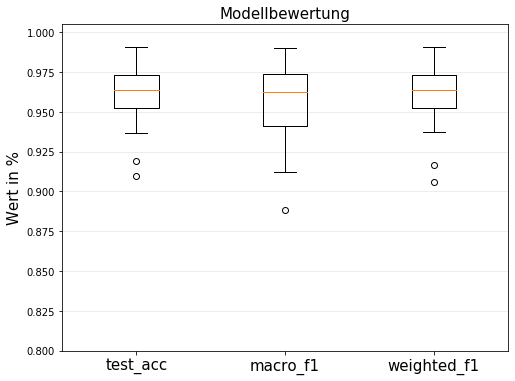

In [30]:
data = [test_acc[:,1], macro_f1, weighted_f1]
data_name = ["test_acc", "macro_f1", "weighted_f1"]

fig, ax = plt.subplots(figsize=(8, 6))
ax.boxplot(data)

ax.set_axisbelow(True)
ax.set_title('Modellbewertung', fontsize=15)
ax.set_ylabel('Wert in %', fontsize=15)
ax.set_ylim(0.8, 1.005)

ax.set_xticklabels(data_name, fontsize=15)

ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
plt.show()
